In [1]:
import os


import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from matplotlib import gridspec
from sklearn.linear_model import LinearRegression as LR

import pandas as pd
from pingouin import mixed_anova, anova, pairwise_tukey, pairwise_ttests
from statsmodels.regression.mixed_linear_model import MixedLM

import TwoPUtils as tpu
import STX3KO_analyses as stx
from STX3KO_analyses import utilities as u


ko_mice = stx.ymaze_sess_deets.ko_mice
ctrl_mice = stx.ymaze_sess_deets.ctrl_mice


%matplotlib inline

%load_ext autoreload
%autoreload 2

/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.4.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
figdir = "/mnt/BigDisk/YMazeResults/neural/reversal"
os.makedirs(figdir,exist_ok=True)

In [3]:
def single_mouse_rev_arrays(concat_sess):
    cellmask = concat_sess.fam_place_cell_mask() + concat_sess.nov_place_cell_mask()>0

    b_mask = (concat_sess.trial_info['block_number']<2)*(concat_sess.trial_info['sess_num']==6)
    b_mask[concat_sess.trial_info['sess_num']<6 ] =True
    ret_mask = (concat_sess.trial_info['block_number']>1)*(concat_sess.trial_info['sess_num']==8)
    rev_mask = (concat_sess.trial_info['sess_num']==7)*(concat_sess.trial_info['block_number']>3)
    rev_mask[(concat_sess.trial_info['block_number']<2)*(concat_sess.trial_info['sess_num']==8)] = True #(~b_mask)*(~ret_mask)
#     rev_mask =  (concat_sess.trial_info['block_number']<2)*(concat_sess.trial_info['sess_num']==8) 
    
    l_b_mask, r_b_mask = b_mask*(concat_sess.trial_info['LR']==-1), b_mask*(concat_sess.trial_info['LR']==1)
    l_rev_mask, r_rev_mask = rev_mask*(concat_sess.trial_info['LR']==-1), rev_mask*(concat_sess.trial_info['LR']==1)
    l_ret_mask, r_ret_mask = ret_mask*(concat_sess.trial_info['LR']==-1), ret_mask*(concat_sess.trial_info['LR']==1)


    trial_mat = concat_sess.trial_matrices['spks_norm'][:,:,cellmask]
#     trial_mat = trial_mat[:,:,:]
#     trial_mat = sp.ndimage.filters.gaussian_filter1d(trial_mat,1,axis=1)

    # baseline sort
    _l_b_tmat, _r_b_tmat = trial_mat[l_b_mask,:,:], trial_mat[r_b_mask,:, :]
    


    # reversal endpoint sort
    _l_rev_tmat, _r_rev_tmat = trial_mat[l_rev_mask,:,:], trial_mat[r_rev_mask,:, :]
#     _l_rev_tmat, _r_rev_tmat = _l_rev_tmat[-20:,:,:], _r_rev_tmat[-20:,:,:]

    # return sort
    _l_ret_tmat, _r_ret_tmat = trial_mat[l_ret_mask,:,:], trial_mat[r_ret_mask,:, :]
    
    return {'b_l_all': np.nanmean(_l_b_tmat, axis=0),
            'b_r_all': np.nanmean(_r_b_tmat , axis=0),
            'b_l_odd': np.nanmean(_l_b_tmat[::2,:,:], axis=0),
            'b_r_odd': np.nanmean(_r_b_tmat[::2,:,:], axis=0),
            'b_l_even': np.nanmean(_l_b_tmat[1::2,:,:], axis=0),
            'b_r_even': np.nanmean(_r_b_tmat[1::2,:,:], axis=0),
                
            'rev_l_all': np.nanmean(_l_rev_tmat, axis=0),
            'rev_r_all': np.nanmean(_r_rev_tmat, axis=0),
            'rev_l_odd': np.nanmean(_l_rev_tmat[::2,:,:], axis=0),
            'rev_r_odd': np.nanmean(_r_rev_tmat[::2,:,:], axis=0),
            'rev_l_even': np.nanmean(_l_rev_tmat[1::2,:,:], axis=0),
            'rev_r_even':np.nanmean(_r_rev_tmat[1::2,:,:], axis=0),
            
            'ret_l_all': np.nanmean(_l_ret_tmat, axis=0),
            'ret_r_all': np.nanmean(_r_ret_tmat, axis=0),
            'ret_l_odd': np.nanmean(_l_ret_tmat[::2,:,:], axis=0),
            'ret_r_odd': np.nanmean(_r_ret_tmat[::2,:,:], axis=0),
            'ret_l_even': np.nanmean(_l_ret_tmat[1::2,:,:], axis=0),
            'ret_r_even': np.nanmean(_r_ret_tmat[1::2,:,:], axis=0),
           }
            

def rev_arrays(mice, concat = True, date_inds = [6,7]):

    res = {'b_l_all': [],
            'b_r_all': [],
            'b_l_odd': [],
            'b_r_odd': [],
            'b_l_even':[],
            'b_r_even':[],
                
            'rev_l_all': [],
            'rev_r_all': [],
            'rev_l_odd': [],
            'rev_r_odd': [],
            'rev_l_even': [],
            'rev_r_even': [],
            
            'ret_l_all': [], 
            'ret_r_all': [], 
            'ret_l_odd': [], 
            'ret_r_odd': [], 
            'ret_l_even': [], 
            'ret_r_even': [],
           }
    
    for mouse in mice:
        _res = single_mouse_rev_arrays(u.single_mouse_concat_sessions(mouse, date_inds = date_inds))
        
        for k,v in _res.items():
            res[k].append(v)
    
    if concat:
        for k,v in res.items():
            res[k] = np.concatenate(v,axis=-1)
            
    return res
        






In [4]:
ctrl_arrays = rev_arrays(ctrl_mice)
ko_arrays = rev_arrays(ko_mice[1:])

05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
['LR', 'block_number']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']


<ipython-input-3-77aa81057b27>:46: RuntimeWarning: Mean of empty slice
  'ret_l_all': np.nanmean(_l_ret_tmat, axis=0),
<ipython-input-3-77aa81057b27>:47: RuntimeWarning: Mean of empty slice
  'ret_r_all': np.nanmean(_r_ret_tmat, axis=0),
<ipython-input-3-77aa81057b27>:48: RuntimeWarning: Mean of empty slice
  'ret_l_odd': np.nanmean(_l_ret_tmat[::2,:,:], axis=0),
<ipython-input-3-77aa81057b27>:49: RuntimeWarning: Mean of empty slice
  'ret_r_odd': np.nanmean(_r_ret_tmat[::2,:,:], axis=0),
<ipython-input-3-77aa81057b27>:50: RuntimeWarning: Mean of empty slice
  'ret_l_even': np.nanmean(_l_ret_tmat[1::2,:,:], axis=0),
<ipython-input-3-77aa81057b27>:51: RuntimeWarning: Mean of empty slice
  'ret_r_even': np.nanmean(_r_ret_tmat[1::2,:,:], axis=0),


05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
06_12_2020 YMaze_LNovel
06_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
06_12_2020 YMaze_LNovel
06_12_2020 YMaze_RewardReversal
07_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_LNovel


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_LNovel


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_006.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_006.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']


In [5]:
sess = u.load_single_day(ctrl_mice[0],0)

{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 0}


(2905,)
(array([20]), array([22])) (array([27]), 29)


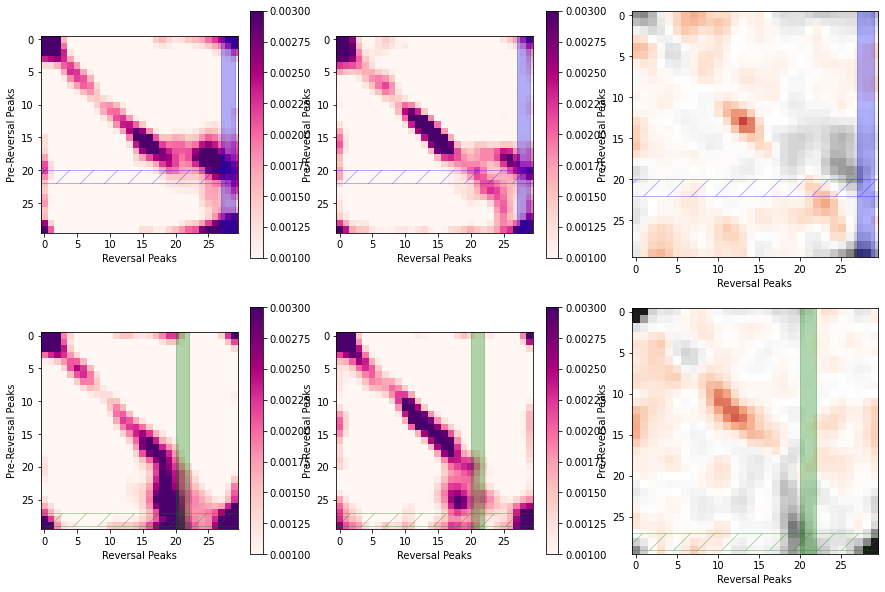

In [6]:
ko_b_max, ko_rev_max = np.argmax(ko_arrays['b_l_all'],axis=0), np.argmax(ko_arrays['rev_l_all'],axis=0)
# ko_b_max, ko_rev_max = stx.spatial_analyses.spatial_com(ko_arrays['b_l_all'].T), stx.spatial_analyses.spatial_com(ko_arrays['rev_l_all'].T)
ctrl_b_max, ctrl_rev_max = np.argmax(ctrl_arrays['b_l_all'],axis=0), np.argmax(ctrl_arrays['rev_l_all'],axis=0)
# ctrl_b_max, ctrl_rev_mask = stx.spatial_analyses.spatial_com(ctrl_arrays['b_l_all']), stx.spatial_analyses.spatial_com(ctrl_arrays['rev_l_all'])

fig,ax = plt.subplots(2, 3, figsize = [15,10])
bins = np.arange(0,31)
# x = np.linspace(0,31)[:,np.newaxis]
# max2d = np.array([b_max, rev_max]).T
# print(max2d.shape)
print(ko_b_max.shape)
def get_smooth_hist(b_max, rev_max):
    hist, xedges, yedges = np.histogram2d(b_max,rev_max, bins = [bins, bins], density = False)
    hist_sm = sp.ndimage.filters.gaussian_filter(hist, (1,1))
    hist_sm /= hist_sm.ravel().sum()
    return hist_sm

# ax[0,0].hist(ctrl_b_max-ctrl_rev_max,bins=bins,color='black', alpha = .3, density=True, cumulative=True)
# ax[0,0].hist(ko_b_max-ko_rev_max,bins=bins, alpha=.3, color='red', density=True, cumulative=True)
l_ctrl_hist_sm = get_smooth_hist(ctrl_b_max,ctrl_rev_max)
h = ax[0,0].imshow(l_ctrl_hist_sm, vmin=.001, vmax = .003, cmap='RdPu')
plt.colorbar(h, ax=ax[0,0])

l_ko_hist_sm = get_smooth_hist(ko_b_max,ko_rev_max)
h = ax[0,1].imshow(l_ko_hist_sm, vmin=.001, vmax = .003, cmap='RdPu')
plt.colorbar(h, ax=ax[0,1])

ax[0,2].imshow(l_ctrl_hist_sm-l_ko_hist_sm, cmap='RdGy', vmin=-.003, vmax= .003)


ko_b_max, ko_rev_max = np.argmax(ko_arrays['b_r_all'],axis=0), np.argmax(ko_arrays['rev_r_all'],axis=0)
ctrl_b_max, ctrl_rev_max = np.argmax(ctrl_arrays['b_r_all'],axis=0), np.argmax(ctrl_arrays['rev_r_all'],axis=0)

r_ctrl_hist_sm = get_smooth_hist(ctrl_b_max,ctrl_rev_max)
h = ax[1,0].imshow(r_ctrl_hist_sm, vmin=.001, vmax = .003, cmap='RdPu')
plt.colorbar(h, ax=ax[1,0])

r_ko_hist_sm = get_smooth_hist(ko_b_max,ko_rev_max)
h = ax[1,1].imshow(r_ko_hist_sm, vmin=.001, vmax = .003, cmap='RdPu')
plt.colorbar(h, ax=ax[1,1])

ax[1,2].imshow(r_ctrl_hist_sm-r_ko_hist_sm, cmap='RdGy', vmin=-.003, vmax= .003)


rz_early = (np.argwhere(sess.trial_matrices['bin_edges'][:-1]>=sess.rzone_early['tfront'])[0], np.argwhere(sess.rzone_early['tback']<=sess.trial_matrices['bin_edges'][1:])[0] )
rz_late = (np.argwhere(sess.trial_matrices['bin_edges'][:-1]>=sess.rzone_late['tfront'])[0], 29 )
print(rz_early,rz_late)
for col in range(3):
    ax[0,col].fill_between(np.linspace(-.5,29.5), rz_early[0], rz_early[1],  alpha=.3, hatch = '/', color='none', edgecolor='blue')
    ax[0,col].fill_betweenx(np.linspace(-.5,29.5), rz_late[0], rz_late[1],  alpha=.3, color='blue')
    
    ax[1,col].fill_betweenx(np.linspace(-.5,29.5), rz_early[0], rz_early[1],  alpha=.3, color='green')
    ax[1,col].fill_between(np.linspace(-.5,29.5), rz_late[0], rz_late[1],  alpha=.3, hatch= '/', color='none', edgecolor='green')
    
    ax[0,col].set_xlabel('Reversal Peaks')
    ax[0,col].set_ylabel('Pre-Reversal Peaks')
    
    ax[1,col].set_xlabel('Reversal Peaks')
    ax[1,col].set_ylabel('Pre-Reversal Peaks')
    

fig.savefig(os.path.join(figdir, "PlaceCellShiftHist.pdf" ),format = 'pdf')

In [7]:
print(rz_early)
print(rz_late)

(array([20]), array([22]))
(array([27]), 29)


N control = 976, N KO = 534, t=0.082332, p = 1.727843e-02
N control = 1670, N KO = 872, t=0.074565, p = 3.201270e-03


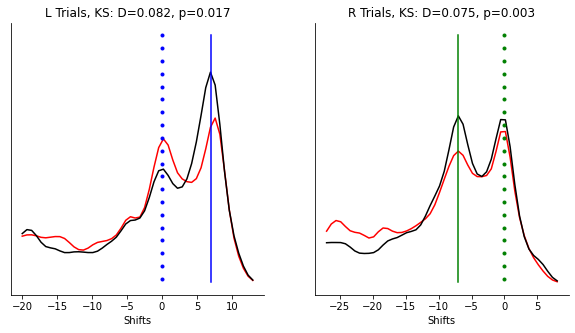

In [9]:
fig,ax = plt.subplots(1,2, sharey=True, figsize= [10,5])

## left trials
ko_b_max, ko_rev_max = np.argmax(ko_arrays['b_l_all'],axis=0), np.argmax(ko_arrays['rev_l_all'],axis=0)
ctrl_b_max, ctrl_rev_max = np.argmax(ctrl_arrays['b_l_all'],axis=0), np.argmax(ctrl_arrays['rev_l_all'],axis = 0)

ko_b_mask = (ko_b_max>17)* (ko_b_max<=22)
ko_shifts = ko_rev_max[ko_b_mask] - ko_b_max[ko_b_mask]

ctrl_b_mask = (ctrl_b_max>17) * (ctrl_b_max<=22)
ctrl_shifts = ctrl_rev_max[ctrl_b_mask] - ctrl_b_max[ctrl_b_mask]

bins = np.linspace(-20,13)[:, np.newaxis]

ko_hist =  tpu.utilities.gaussian(bins, 1.5, ko_shifts[np.newaxis,:]).mean(axis=-1)
ko_hist /= ko_hist.sum()
ax[0].plot(bins.ravel(),ko_hist, color= 'red')
ctrl_hist =  tpu.utilities.gaussian(bins, 1.5, ctrl_shifts[np.newaxis,:]).mean(axis=-1)
ctrl_hist /= ctrl_hist.sum()
ax[0].plot(bins.ravel(),ctrl_hist, color= 'black')
t,p = sp.stats.ks_2samp(ctrl_shifts,ko_shifts)

print("N control = %d, N KO = %d, t=%f, p = %e" % (ctrl_shifts.shape[0], ko_shifts.shape[0],t,p))
ax[0].set_yticks([])
ax[0].set_xlabel('Shifts')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_title("L Trials, KS: D=%.3f, p=%.3f" % (t,p))


## right trials
ko_b_max, ko_rev_max = np.argmax(ko_arrays['b_r_all'],axis=0), np.argmax(ko_arrays['rev_r_all'],axis=0)
ctrl_b_max, ctrl_rev_max = np.argmax(ctrl_arrays['b_r_all'],axis=0), np.argmax(ctrl_arrays['rev_r_all'],axis = 0)

ko_b_mask = (ko_b_max>22)* (ko_b_max<=29)
ko_shifts = ko_rev_max[ko_b_mask] - ko_b_max[ko_b_mask]

ctrl_b_mask = (ctrl_b_max>22) * (ctrl_b_max<=29)
ctrl_shifts = ctrl_rev_max[ctrl_b_mask] - ctrl_b_max[ctrl_b_mask]

bins = np.linspace(-27,8)[:, np.newaxis]

ko_hist =  tpu.utilities.gaussian(bins, 1.5, ko_shifts[np.newaxis,:]).mean(axis=-1)
ko_hist /= ko_hist.sum()
ax[1].plot(bins.ravel(),ko_hist, color= 'red')
ctrl_hist =  tpu.utilities.gaussian(bins, 1.5, ctrl_shifts[np.newaxis,:]).mean(axis=-1)
ctrl_hist /= ctrl_hist.sum()
ax[1].plot(bins.ravel(),ctrl_hist, color= 'black')
t,p = sp.stats.ks_2samp(ctrl_shifts,ko_shifts)
print("N control = %d, N KO = %d, t=%f, p = %e" % (ctrl_shifts.shape[0], ko_shifts.shape[0],t,p))
ax[1].set_yticks([])
ax[1].set_xlabel('Shifts')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_title("R Trials, KS: D=%.3f, p=%.3f" % (t,p))
                                                                               
_z = np.linspace(.001,.07, num=20)
ax[0].plot(0*_z,_z,marker='.',linewidth=0, color='blue')
ax[0].plot([7,7], [0,.07], color='blue')

ax[1].plot(0*_z,_z,marker='.',linewidth=0, color='green')
ax[1].plot([-7,-7], [0,.07], color='green')

fig.savefig(os.path.join(figdir, "rewardcell_shifts.pdf"), format='pdf')

In [9]:
def reversal_plots(arrays):

    fig_l, ax = plt.subplots(2,2, figsize=[10,10])
    fig_l.subplots_adjust(wspace=.3)

    b_l_sort = np.argsort(np.argmax(arrays['b_l_odd'],axis=0))
    b_l_mu, b_l_std = np.nanmean(arrays['b_l_odd'],axis=0, keepdims=True), np.nanstd(arrays['b_l_odd'], axis=0, keepdims=True)
    b_l_plot = (arrays['b_l_even']-b_l_mu)/b_l_std
    ax[0,0].imshow(b_l_plot[:,b_l_sort].T,cmap='pink',vmin=0,vmax=4, aspect='auto')
    ax[0,0].set_title("N cells %d" % b_l_plot.shape[1])
    
    rev_b_l_plot = sp.stats.zscore(arrays['rev_l_all'],axis=0)
    ax[0,1].imshow(rev_b_l_plot[:,b_l_sort].T, cmap = 'pink', vmin=0, vmax=4, aspect='auto')
    ax[0,1].set_title("N cells %d" % rev_b_l_plot.shape[1])


    rev_l_sort = np.argsort(np.argmax(arrays['rev_l_odd'],axis=0))
    rev_l_plot = sp.stats.zscore(arrays['rev_l_even'], axis = 0)
    ax[1,1].imshow(rev_l_plot[:,rev_l_sort].T,cmap='pink',vmin=0,vmax=4, aspect='auto')
    ax[1,1].set_title("N cells %d" % rev_l_plot.shape[1])

    b_rev_l_plot = sp.stats.zscore(arrays['b_l_all'],axis=0)
    ax[1,0].imshow(b_rev_l_plot[:,rev_l_sort].T, cmap = 'pink', vmin=0, vmax=4, aspect='auto')
    ax[1,0].set_title("N cells %d" % b_rev_l_plot.shape[1])


    for r in range(2):
        for c in range(2):
            ax[r,c,].plot([-.5,29.5], [0,b_l_plot.shape[1]-1], color='blue', linewidth=3)

    ######
    fig_r, ax = plt.subplots(2,2, figsize=[10,10])
    fig_r.subplots_adjust(wspace=.3)

    b_r_sort = np.argsort(np.argmax(arrays['b_r_odd'],axis=0))
    b_r_plot = sp.stats.zscore(arrays['b_r_even'], axis=0)
    ax[0,0].imshow(b_r_plot[:,b_r_sort].T,cmap='pink',vmin=0,vmax=4, aspect='auto')
    ax[0,0].set_title("N cells %d" % b_r_plot.shape[1])

    rev_b_r_plot = sp.stats.zscore(arrays['rev_r_all'], axis =0)
    ax[0,1].imshow(rev_b_r_plot[:,b_r_sort].T, cmap = 'pink', vmin=0, vmax=4, aspect='auto')
    ax[0,1].set_title("N cells %d" % rev_b_r_plot.shape[1])


    rev_r_sort = np.argsort(np.argmax(arrays['rev_r_odd'],axis=0))
    rev_r_plot = sp.stats.zscore(arrays['rev_r_even'], axis=0)
    ax[1,1].imshow(rev_r_plot[:,rev_r_sort].T,cmap='pink',vmin=0,vmax=4, aspect='auto')
    ax[1,1].set_title("N cells %d" % rev_r_plot.shape[1])

    b_rev_r_plot = sp.stats.zscore(arrays['b_r_all'], axis = 0)
    ax[1,0].imshow(b_rev_l_plot[:,rev_r_sort].T, cmap = 'pink', vmin=0, vmax=4, aspect='auto')
    ax[1,0].set_title("N cells %d" % b_rev_r_plot.shape[1])

    
    for r in range(2):
        for c in range(2):
            ax[r,c,].plot([-.5,29.5], [0,b_r_plot.shape[1]-1], color='blue', linewidth=3)
            
    return fig_l, fig_r


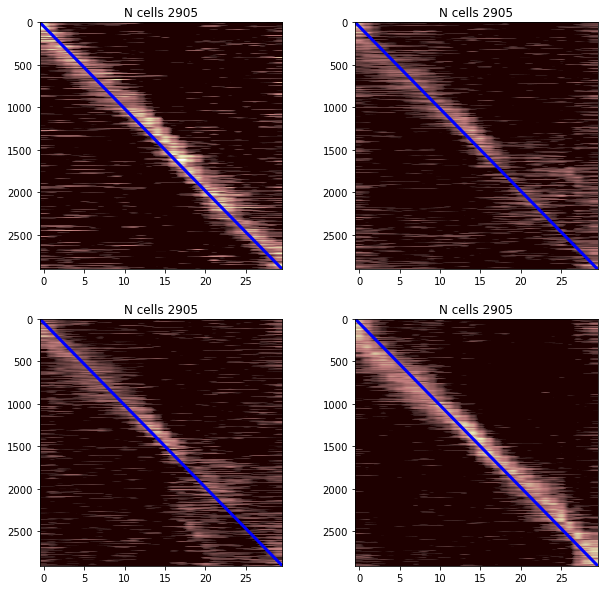

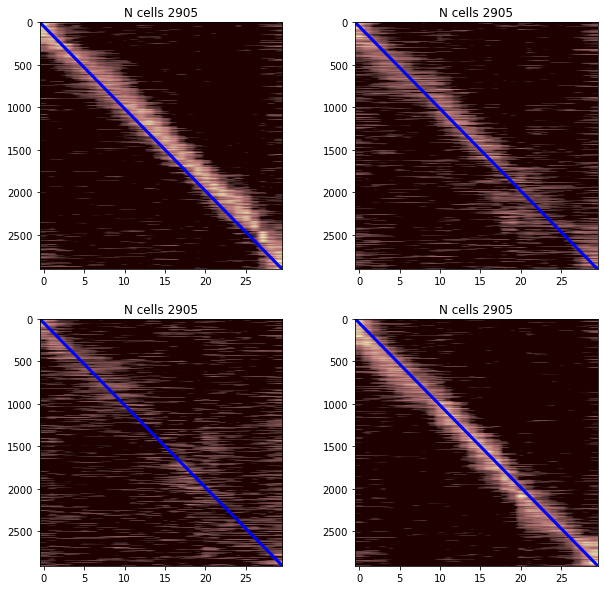

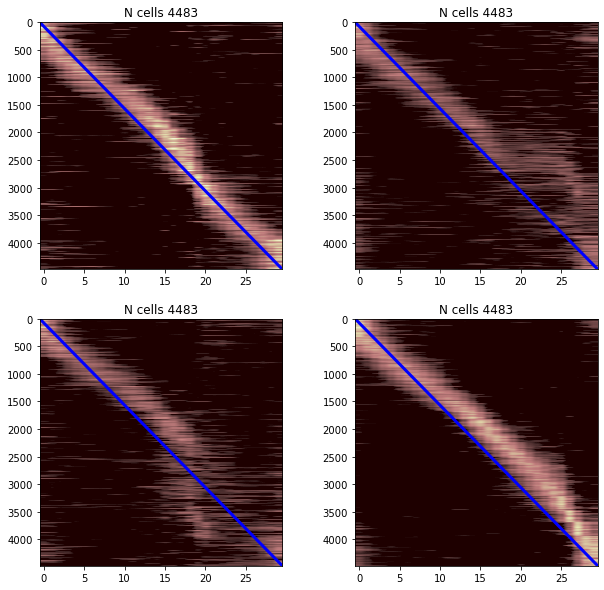

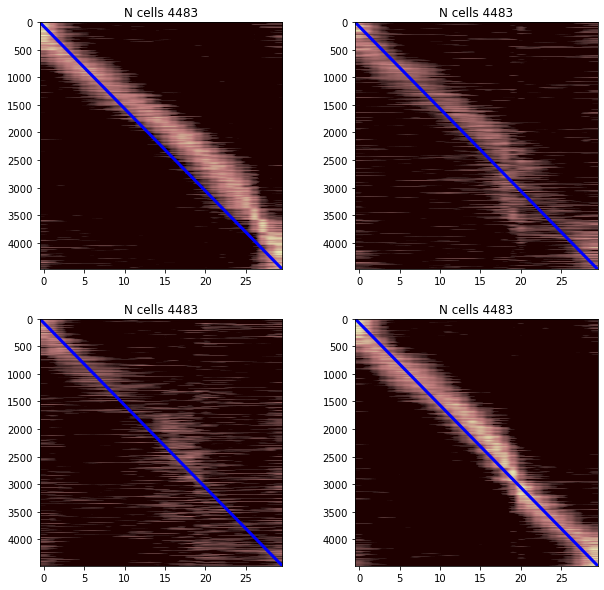

In [10]:
ko_fig_l, ko_fig_r = reversal_plots(ko_arrays)
ko_fig_l.savefig(os.path.join(figdir, "ko_l_reversal_pop_plots.pdf") , format = 'pdf')
ko_fig_r.savefig(os.path.join(figdir, "ko_r_reversal_pop_plots.pdf") , format = 'pdf')

ctrl_fig_l, ctrl_fig_r = reversal_plots(ctrl_arrays)
ctrl_fig_l.savefig(os.path.join(figdir, "ctrl_l_reversal_pop_plots.pdf") , format = 'pdf')
ctrl_fig_r.savefig(os.path.join(figdir, "ctrl_r_reversal_pop_plots.pdf") , format = 'pdf')

In [11]:
ctrl_arrays = rev_arrays(ctrl_mice, concat = False)
ko_arrays = rev_arrays(ko_mice[1:], concat = False)

05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']


<ipython-input-3-77aa81057b27>:46: RuntimeWarning: Mean of empty slice
  'ret_l_all': np.nanmean(_l_ret_tmat, axis=0),
<ipython-input-3-77aa81057b27>:47: RuntimeWarning: Mean of empty slice
  'ret_r_all': np.nanmean(_r_ret_tmat, axis=0),
<ipython-input-3-77aa81057b27>:48: RuntimeWarning: Mean of empty slice
  'ret_l_odd': np.nanmean(_l_ret_tmat[::2,:,:], axis=0),
<ipython-input-3-77aa81057b27>:49: RuntimeWarning: Mean of empty slice
  'ret_r_odd': np.nanmean(_r_ret_tmat[::2,:,:], axis=0),
<ipython-input-3-77aa81057b27>:50: RuntimeWarning: Mean of empty slice
  'ret_l_even': np.nanmean(_l_ret_tmat[1::2,:,:], axis=0),
<ipython-input-3-77aa81057b27>:51: RuntimeWarning: Mean of empty slice
  'ret_r_even': np.nanmean(_r_ret_tmat[1::2,:,:], axis=0),


05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
06_12_2020 YMaze_LNovel
06_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
06_12_2020 YMaze_LNovel
06_12_2020 YMaze_RewardReversal
07_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_LNovel


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_LNovel


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_006.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_006.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']


(5, 30)
(4, 30)
(5, 30)
(4, 30)
(5, 30)
(4, 30)
(5, 30)
(4, 30)
(5, 30)
(5, 30)
(4, 30)
(4, 30)
(5, 30)
(5, 30)
(4, 30)
(4, 30)
sig decrease L early
ctrl
-4.089073890838194 0.014986495355658953
ko
1.012354939694589 0.3859249859370448
sig increase L late
ctrl
0.5083898661853051 0.6379358823671191
ko
-1.8887970137573744 0.15533889676436705
sig increase R early
ctrl
2.143272754855543 0.09872425998618596
ko
-0.3711235026698004 0.7352047154000697
sig decrease R late
ctrl
-2.3046338234411703 0.08251747015984238
ko
0.39311354689879835 0.7205056873791411


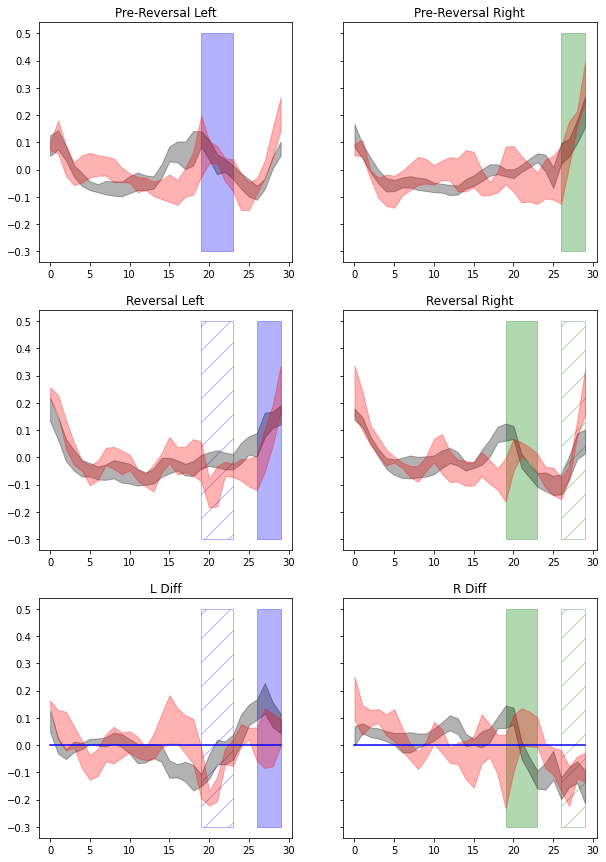

In [12]:
rz_early = (np.argwhere(sess.trial_matrices['bin_edges'][1:]>=sess.rzone_early['tfront'])[0][0], np.argwhere(sess.rzone_early['tback']<=sess.trial_matrices['bin_edges'][:-1])[0] )
rz_late = (np.argwhere(sess.trial_matrices['bin_edges'][1:]>=sess.rzone_late['tfront'])[0][0], 29 )
x = np.arange(30)
def musem(arrays):
    mu = []
    for arr in arrays:
        mu.append(sp.stats.zscore(arr,axis=0).mean(axis=1))
    mu = np.array(mu)
    print(mu.shape)
    return mu, mu.mean(axis=0), sp.stats.sem(mu,axis=0)


fig,ax = plt.subplots(3,2, figsize= [10, 15], sharey=True)

ctrl_arr, mu, sem = musem(ctrl_arrays['b_l_all'])
ax[0,0].fill_between(x, mu-sem, mu+sem, color='black', alpha = .3)
ko_arr, mu,sem = musem(ko_arrays['b_l_all'])
ax[0,0].fill_between(x, mu-sem, mu+sem, color='red', alpha = .3)
ax[0,0].fill_betweenx([-.3, .5], rz_early[0], rz_early[1],  alpha=.3, color='blue',zorder= -1)
ax[0, 0].set_title('Pre-Reversal Left')

ctrl_arr, mu, sem = musem(ctrl_arrays['b_r_all'])
ax[0,1].fill_between(x, mu-sem, mu+sem, color='black', alpha = .3)
ko_arr, mu,sem = musem(ko_arrays['b_r_all'])
ax[0,1].fill_between(x, mu-sem, mu+sem, color='red', alpha = .3)
ax[0,1].fill_betweenx([-.3, .5], rz_late[0], rz_late[1],  alpha=.3, color='green',zorder= -1)
ax[0,1].set_title("Pre-Reversal Right" )


ctrl_arr, mu, sem = musem(ctrl_arrays['rev_l_all'])
ax[1,0].fill_between(x, mu-sem, mu+sem, color='black', alpha = .3)
ko_arr, mu,sem = musem(ko_arrays['rev_l_all'])
ax[1,0].fill_between(x, mu-sem, mu+sem, color='red', alpha = .3)
ax[1,0].fill_betweenx([-.3, .5], rz_early[0], rz_early[1],  alpha=.3, color='none', hatch='/', edgecolor='blue',zorder= -1)
ax[1,0].fill_betweenx([-.3,.5], rz_late[0], rz_late[1],  alpha=.3, color='blue', zorder= -1)
ax[1,0].set_title('Reversal Left')


ctrl_arr, mu, sem = musem(ctrl_arrays['rev_r_all'])
ax[1,1].fill_between(x, mu-sem, mu+sem, color='black', alpha = .3)
ko_arr, mu,sem = musem(ko_arrays['rev_r_all'])
ax[1,1].fill_between(x, mu-sem, mu+sem, color='red', alpha = .3)
ax[1,1].fill_betweenx([-.3, .5], rz_late[0], rz_late[1],  alpha=.3, color='none', hatch='/', edgecolor='green',zorder= -1)
ax[1,1].fill_betweenx([-.3,.5], rz_early[0], rz_early[1],  alpha=.3, color='green', zorder= -1)
ax[1,1].set_title('Reversal Right')


l_pre_ctrl_arr, _, _ = musem(ctrl_arrays['b_l_all'])
l_rev_ctrl_arr, _, _ = musem(ctrl_arrays['rev_l_all'])
arr = l_rev_ctrl_arr-l_pre_ctrl_arr
mu,sem = arr.mean(axis=0), sp.stats.sem(arr, axis=0)
ax[2,0].fill_between(x, mu-sem, mu+sem, color='black', alpha=.3)

l_pre_ko_arr, _, _ = musem(ko_arrays['b_l_all'])
l_rev_ko_arr, _, _ = musem(ko_arrays['rev_l_all'])
arr = l_rev_ko_arr - l_pre_ko_arr
mu,sem = arr.mean(axis=0), sp.stats.sem(arr, axis=0)
ax[2,0].fill_between(x, mu-sem, mu+sem, color='red', alpha=.3)

ax[2,0].fill_betweenx([-.3, .5], rz_early[0], rz_early[1],  alpha=.3, color='none', hatch='/', edgecolor='blue',zorder= -1)
ax[2,0].fill_betweenx([-.3,.5], rz_late[0], rz_late[1],  alpha=.3, color='blue', zorder= -1)
ax[2,0].plot(x, 0*x, color='blue')
ax[2,0].set_title("L Diff")


r_pre_ctrl_arr, _, _ = musem(ctrl_arrays['b_r_all'])
r_rev_ctrl_arr, _, _ = musem(ctrl_arrays['rev_r_all'])
arr = r_rev_ctrl_arr-r_pre_ctrl_arr
mu,sem = arr.mean(axis=0), sp.stats.sem(arr, axis=0)
ax[2,1].fill_between(x, mu-sem, mu+sem, color='black', alpha=.3)

r_pre_ko_arr, _, _ = musem(ko_arrays['b_r_all'])
r_rev_ko_arr, _, _ = musem(ko_arrays['rev_r_all'])
arr = r_rev_ko_arr - r_pre_ko_arr
mu,sem = arr.mean(axis=0), sp.stats.sem(arr, axis=0)
ax[2,1].fill_between(x, mu-sem, mu+sem, color='red', alpha=.3)

ax[2,1].fill_betweenx([-.3, .5], rz_late[0], rz_late[1],  alpha=.3, color='none', hatch='/', edgecolor='green',zorder= -1)
ax[2,1].fill_betweenx([-.3,.5], rz_early[0], rz_early[1],  alpha=.3, color='green', zorder= -1)
ax[2,1].plot(x, 0*x, color='blue')
ax[2,1].set_title("R Diff")

fig.savefig(os.path.join(figdir, "NormActivityRateVPos.pdf"), format='pdf')

print('sig decrease L early')
print('ctrl')
t,p = sp.stats.ttest_rel(l_rev_ctrl_arr[:,rz_early[0]-5:rz_early[0]].mean(axis=1), l_pre_ctrl_arr[:,rz_early[0]-5:rz_early[0]].mean(axis=1))
print(t,p)
print('ko')
t,p = sp.stats.ttest_rel(l_rev_ko_arr[:,rz_early[0]-5:rz_early[0]].mean(axis=1), l_pre_ko_arr[:,rz_early[0]-5:rz_early[0]].mean(axis=1))
print(t,p)
# print('diff')
# ctrl_arr = l_rev_ctrl_arr[:,rz_early[0]-5:rz_early[0]].mean(axis=1) - l_pre_ctrl_arr[:,rz_early[0]-5:rz_early[0]].mean(axis=1)
# ko_arr = l_rev_ko_arr[:,rz_early[0]-5:rz_early[0]].mean(axis=1) - l_pre_ko_arr[:,rz_early[0]-5:rz_early[0]].mean(axis=1)
# t,p = sp.stats.ttest_ind(ctrl_arr,ko_arr)
# print(t,p)

print('sig increase L late')
print('ctrl')
t,p = sp.stats.ttest_rel(l_rev_ctrl_arr[:,rz_late[0]-5:rz_late[0]].mean(axis=1), l_pre_ctrl_arr[:,rz_late[0]-5:rz_late[0]].mean(axis=1))
print(t,p)
print('ko')
t,p = sp.stats.ttest_rel(l_rev_ko_arr[:,rz_late[0]-5:rz_late[0]].mean(axis=1), l_pre_ko_arr[:,rz_late[0]-5:rz_late[0]].mean(axis=1))
print(t,p)

print('sig increase R early')
print('ctrl')
t,p = sp.stats.ttest_rel(r_rev_ctrl_arr[:,rz_early[0]-5:rz_early[0]].mean(axis=1), r_pre_ctrl_arr[:,rz_early[0]-5:rz_early[0]].mean(axis=1))
print(t,p)
print('ko')
t,p = sp.stats.ttest_rel(r_rev_ko_arr[:,rz_early[0]-5:rz_early[0]].mean(axis=1), r_pre_ko_arr[:,rz_early[0]-5:rz_early[0]].mean(axis=1))
print(t,p)

print('sig decrease R late')
print('ctrl')
t,p = sp.stats.ttest_rel(r_rev_ctrl_arr[:,rz_late[0]-5:rz_late[0]].mean(axis=1), r_pre_ctrl_arr[:,rz_late[0]-5:rz_late[0]].mean(axis=1))
print(t,p)
print('ko')
t,p = sp.stats.ttest_rel(r_rev_ko_arr[:,rz_late[0]-5:rz_late[0]].mean(axis=1), r_pre_ko_arr[:,rz_late[0]-5:rz_late[0]].mean(axis=1))
print(t,p)

In [13]:

def corr_ratio_rev(concat_sess, metric = 'corr', cellavg = True, day7test=False):
    cellmask = concat_sess.fam_place_cell_mask()+concat_sess.nov_place_cell_mask()>0
    if not cellavg:
        trialmat = concat_sess.trial_matrices['spks_norm'][:,:,cellmask]
    else:
        trialmat = concat_sess.trial_matrices['spks'][:,:,cellmask]
    trialmat = trialmat[:,10:,:]
    trialmat[np.isnan(trialmat)] = 1E-3
    trialmat = sp.ndimage.filters.gaussian_filter1d(trialmat[:,10:,:],1,axis=1)
    lickmat = concat_sess.trial_matrices['licks']
#     lickmat[np.isnan(lickmat)]=0.

    res = {}
    for lr in [-1,1]:
    
        baseline_mask = (concat_sess.trial_info['sess_num']==6)*(concat_sess.trial_info['block_number']<2)*(concat_sess.trial_info['LR']==lr)
        baseline_mask[concat_sess.trial_info['sess_num']<6]=True
        baseline = trialmat[baseline_mask,:,:].mean(axis=0,keepdims=True)
        if lr == -1:
            print('lr', concat_sess.rzone_early['t_antic'], concat_sess.rzone_early['tfront'])
            rzone_mask = (concat_sess.trial_matrices['bin_edges'][:-1]>=concat_sess.rzone_early['t_antic']) * (concat_sess.trial_matrices['bin_edges'][1:]<=concat_sess.rzone_early['tfront'])
        elif lr == 1:
            rzone_mask = (concat_sess.trial_matrices['bin_edges'][:-1]>=concat_sess.rzone_late['t_antic']) * (concat_sess.trial_matrices['bin_edges'][1:]<=concat_sess.rzone_late['tfront'])
        
        

        endpoint_mask = (concat_sess.trial_info['sess_num']==8)*(concat_sess.trial_info['block_number']<2)*(concat_sess.trial_info['LR']==lr)
        endpoint_mask[(concat_sess.trial_info['sess_num']==7)*(concat_sess.trial_info['block_number']>3)*(concat_sess.trial_info['LR']==lr)] = True
        endpoint = trialmat[endpoint_mask,:,:].mean(axis=0,keepdims=True)


        test_mask = (concat_sess.trial_info['LR']==lr) *(concat_sess.trial_info['sess_num']==6)*(concat_sess.trial_info['block_number']>=2)
        if day7test:
            test_mask[(concat_sess.trial_info['sess_num']==7)*(concat_sess.trial_info['block_number']<=3)*(concat_sess.trial_info['LR']==lr)] = True
#         test_mask = (concat_sess.trial_info['sess_num']==7)*(concat_sess.trial_info['block_number']<=3)*(concat_sess.trial_info['LR']==lr)
        test = trialmat[test_mask,:,:]
        
        
        
        
        
        assert (metric in ('corr', 'cos')), "wrong metric"
                
        if metric == 'corr':
            if cellavg:
                baseline = sp.stats.zscore(baseline,axis=1)
                endpoint = sp.stats.zscore(endpoint,axis=1)
                test = sp.stats.zscore(test,axis=1)


                _corr_to_baseline = 1./test.shape[1]*np.matmul(np.transpose(test,axes=(0,2,1)),baseline)   
                _corr_to_endpoint = 1./test.shape[1]*np.matmul(np.transpose(test,axes=(0,2,1)),endpoint)
                
                corr_base_end = np.diag(1./test.shape[1]*np.squeeze(np.matmul(np.transpose(baseline,axes=(0,2,1)),endpoint)))
            else:
                baseline = sp.stats.zscore(baseline,axis=-1)
                endpoint = sp.stats.zscore(endpoint,axis=-1)
                test = sp.stats.zscore(test,axis=-1)


                _corr_to_baseline = 1./test.shape[-1]*np.matmul(baseline, np.transpose(test,axes=(0,2,1)))   
                _corr_to_endpoint = 1./test.shape[-1]*np.matmul(endpoint, np.transpose(test,axes=(0,2,1)))
                
                corr_base_end = np.diag(1./test.shape[-1]*np.squeeze(np.matmul(endpoint, np.transpose(baseline,axes=(0,2,1)))))
 
        elif metric == 'cos':
            if cellavg:
                baseline /= np.linalg.norm(baseline,ord=2,axis=1, keepdims=True) + 1E-3
                endpoint /= np.linalg.norm(endpoint,ord=2,axis=1, keepdims=True) + 1E-3
                test /= np.linalg.norm(test,ord=2,axis=1, keepdims=True) + 1E-3
            
                _corr_to_baseline = np.matmul(np.transpose(test,axes=(0,2,1)),baseline)
                _corr_to_endpoint = np.matmul(np.transpose(test,axes=(0,2,1)),endpoint)
                
                corr_base_end = np.diag(np.squeeze(np.matmul(np.transpose(baseline,axes=(0,2,1)),endpoint)))
            else:
                baseline /= np.linalg.norm(baseline,ord=2,axis=-1, keepdims=True) + 1E-3
                endpoint /= np.linalg.norm(endpoint,ord=2,axis=-1, keepdims=True) + 1E-3
                test /= np.linalg.norm(test,ord=2,axis=-1, keepdims=True) + 1E-3
            
                _corr_to_baseline = np.matmul(baseline, np.transpose(test,axes=(0,2,1)))
                _corr_to_endpoint = np.matmul(endpoint, np.transpose(test,axes=(0,2,1)))
   
                corr_base_end = np.diag(np.squeeze(np.matmul(endpoint, np.transpose(baseline,axes=(0,2,1)))))
                
            
            
            
        corr_to_baseline = np.array([np.diag(_corr_to_baseline[trial,:,:]).mean() for trial in range(test.shape[0])])
        corr_to_endpoint = np.array([np.diag(_corr_to_endpoint[trial,:,:]).mean() for trial in range(test.shape[0])])
#         print(corr_to_baseline)
#         print(corr_to_endpoint)
        
        res[lr]= {'trial': -1*np.log(np.maximum(1E-3,corr_to_endpoint)) + np.log(np.maximum(1E-3,corr_to_baseline)), 
                  'endpoints': corr_base_end}
        
    return res







In [14]:
ko_corr_ratio = {mouse:corr_ratio_rev(stx.utilities.single_mouse_concat_sessions(mouse,date_inds=[ 6, 7]),metric='cos', cellavg = True ) for mouse in stx.ymaze_sess_deets.KO_sessions.keys() if mouse not in ['4467975.1']}
ctrl_corr_ratio = {mouse:corr_ratio_rev(stx.utilities.single_mouse_concat_sessions(mouse,date_inds=[6, 7]),metric='cos', cellavg= True ) for mouse in stx.ymaze_sess_deets.CTRL_sessions.keys()}

/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_LNovel


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
lr 25.67690445738824 32.67690445738824


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_LNovel


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_006.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_006.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
lr 25.67690445738824 32.67690445738824
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
lr 25.67690445738824 32.67690445738824
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
lr 25.67690445738824 32.67690445738824
05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
lr 25.67690445738824 32.67690445738824
05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_rav

L endpoints 0.8131694945724458 0.4428960539709167
endpoints 2.8819377020685213 0.02358621182316822
4467975.2 trials 39
4467975.2 trials 37
4467975.3 trials 25
4467975.3 trials 26
4467975.4 trials 37
4467975.4 trials 34
4467975.5 trials 19
4467975.5 trials 16
4467331.1 trials 39
4467331.1 trials 39
4467331.2 trials 39
4467331.2 trials 39
4467332.1 trials 39
4467332.1 trials 39
4467332.2 trials 39
4467332.2 trials 39
4467333.1 trials 39
4467333.1 trials 39
ko_slopes  [[-0.00386075 -0.00268844]
 [-0.00496798 -0.00294254]
 [-0.00270752 -0.00263398]
 [-0.00419149 -0.00461517]]
-2.977734321229965 0.020580836643657313
-1.096916612083313 0.3089729972071642


/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


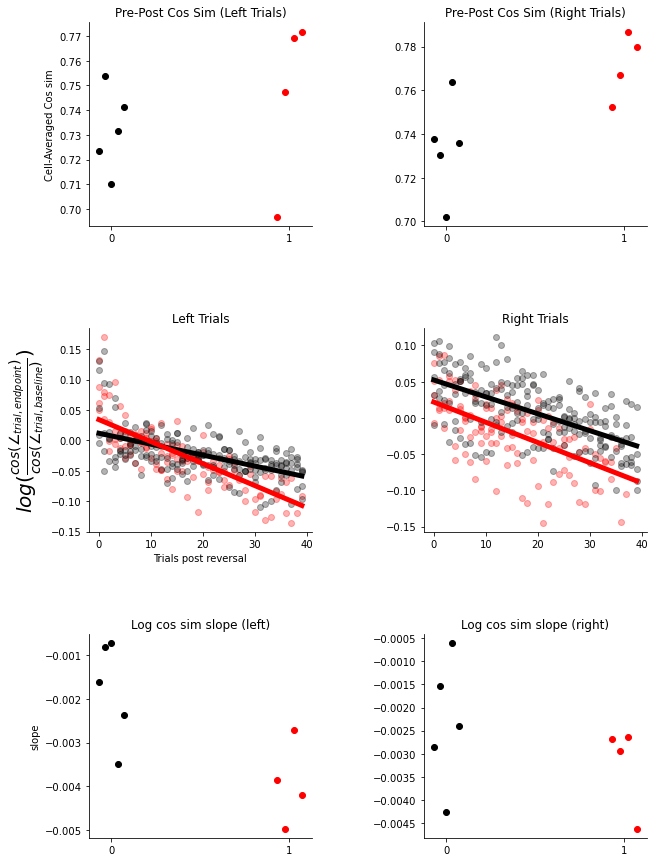

In [15]:
fig,ax = plt.subplots(3,2, figsize=[10,15])
fig.subplots_adjust(wspace=.5, hspace=.5)

rng = np.random.default_rng()


## correlation to endpoints
ko_jitter = np.linspace(-.07,.07,num=4) #.05*rng.standard_normal([4,])
ctrl_jitter = np.linspace(-.07,.07,num=5) #.05*rng.standard_normal([5,])

# [res[-1]['endpoints'] for mouse, res in ko_corr_ratio.items()]
l_ko_corr = [res[-1]['endpoints'].mean() for mouse, res in ko_corr_ratio.items() if mouse not in ['4467975.1']]
l_ctrl_corr = [res[-1]['endpoints'].mean() for mouse, res in ctrl_corr_ratio.items()]# if mouse not in ['4467975.1']]
t,p = sp.stats.ttest_ind(l_ko_corr,l_ctrl_corr)
# t,p = sp.stats.ranksums(l_ko_corr,l_ctrl_corr)
print('L endpoints', t, p)
ax[0,0].scatter(np.ones([4,]) + ko_jitter,l_ko_corr,color='red')
ax[0,0].scatter(np.zeros([5,])+ ctrl_jitter,l_ctrl_corr,color='black')
ax[0,0].set_xticks([0,1])
# ax[0,0].set_ylim([.68, .8])
ax[0,0].set_ylabel('Cell-Averaged Cos sim')
ax[0,0].set_title('Pre-Post Cos Sim (Left Trials)')



r_ko_corr = [res[1]['endpoints'].mean() for mouse, res in ko_corr_ratio.items() if mouse not in ['4467975.1']]
r_ctrl_corr = [res[1]['endpoints'].mean() for mouse, res in ctrl_corr_ratio.items()]# if mouse not in ['4467975.1']]
t,p = sp.stats.ttest_ind(r_ko_corr,r_ctrl_corr)
# t,p = sp.stats.ranksums(r_ko_corr,r_ctrl_corr)
print('endpoints', t, p)
ax[0,1].scatter(np.ones([4,]) + ko_jitter, r_ko_corr,color='red')
ax[0,1].scatter(np.zeros([5,]) + ctrl_jitter, r_ctrl_corr,color='black')
ax[0,1].set_xticks([0,1])
# ax[0,1].set_ylim([.68, .8])
ax[0,1].set_title('Pre-Post Cos Sim (Right Trials)')
    
## trial by trial change in correlation

df_l = pd.DataFrame({'mouse':[],
                  'trial': [],
                  'ko': [],
                  'ko_x_trial': [],
                  'llr': [],
                  'intercept': [],
                  })
df_r = pd.DataFrame({'mouse':[],
                  'trial': [],
                  'ko': [],
                  'ko_x_trial': [],
                  'llr': [],
                  'intercept': [],
                  })

ko_slopes =  np.zeros([4,2])
m = 0
for mouse, res  in ko_corr_ratio.items():
    for i, lr in enumerate([-1,1]):
        arr = res[lr]['trial'][:40]
        trials = np.arange(0,np.amin([40,arr.shape[0]]))
        print(mouse, "trials %d" % trials[-1])
        
        for t, a in enumerate(arr):
            if i ==0:
                df_l = df_l.append({'mouse': mouse,
                                   'trial': t,
                                   'ko': 1,
                                   'ko_x_trial': t,
                                   'llr': a,
                                   'intercept': 1},ignore_index=True)
            else:
                df_r = df_r.append({'mouse': mouse,
                                   'trial': t,
                                   'ko': 1,
                                   'ko_x_trial': t,
                                   'llr': a,
                                   'intercept': 1},ignore_index=True)
        
#         trials = np.arange(0,arr.shape[0])
#         print(arr)
        if mouse not in ['4467975.1']:
            ax[1,i].scatter(trials, arr, color='red',alpha=.3)

            reg_res = sp.stats.linregress(trials,arr)
#             print(mouse, 'lr',lr,reg_res.slope)
            ko_slopes[m,i] = reg_res.slope
            if i==1:
                m+=1
        
ctrl_slopes =  np.zeros([5,2])
for m, (mouse, res)  in enumerate(ctrl_corr_ratio.items()):
    for i, lr in enumerate([-1,1]):
        arr = res[lr]['trial'][:40]
        trials = np.arange(0,np.amin([40,arr.shape[0]]))
        print(mouse, "trials %d" % trials[-1])
        for t, a in enumerate(arr):
            if i ==0:
                df_l = df_l.append({'mouse': mouse,
                                   'trial': t,
                                   'ko': 0,
                                   'ko_x_trial': 0,
                                   'llr': a,
                                   'intercept': 1},ignore_index=True)
            else:
                df_r = df_r.append({'mouse': mouse,
                                   'trial': t,
                                   'ko': 0,
                                   'ko_x_trial': 0,
                                   'llr': a,
                                   'intercept': 1},ignore_index=True)
#         trials = np.arange(0,arr.shape[0])
#         if mouse not in ['4467975.1']:
        ax[1,i].scatter(trials, arr, color='black',alpha=.3)
            
        
        reg_res = sp.stats.linregress(trials,arr)
        ctrl_slopes[m,i] = reg_res.slope

ax[1,0].set_ylabel(r'$log(\frac{cos(\angle_{trial, endpoint})}{cos(\angle_{trial, baseline})})$',fontsize=20)
ax[1,0].set_title('Left Trials')
ax[1,1].set_title('Right Trials')
ax[1,0].set_xlabel('Trials post reversal')



## slopes
ax[2,0].scatter(np.ones([4,]) + ko_jitter, ko_slopes[:,0], color='red')
ax[2,0].scatter(np.zeros([5,]) + ctrl_jitter, ctrl_slopes[:,0], color='black')
ax[2,0].set_xticks([0,1])
# ax[2,0].set_ylim([-.015, 0])
ax[2,0].set_ylabel('slope')
ax[2,0].set_title('Log cos sim slope (left)')

print('ko_slopes ', ko_slopes)
ax[2,1].scatter(np.ones([4,]) + ko_jitter, ko_slopes[:,1], color='red')
ax[2,1].scatter(np.zeros([5,]) + ctrl_jitter, ctrl_slopes[:,1], color='black')
ax[2,1].set_xticks([0,1])
# ax[2,1].set_ylim([-.015, 0])
ax[2,1].set_title('Log cos sim slope (right)')

t,p = sp.stats.ttest_ind(ko_slopes[:,0],ctrl_slopes[:,0])
# t,p = sp.stats.ranksums(ko_slopes[:,0],ctrl_slopes[:,0])
print(t,p)

t,p = sp.stats.ttest_ind(ko_slopes[:,1],ctrl_slopes[:,1])
# t,p = sp.stats.ranksums(ko_slopes[:,1],ctrl_slopes[:,1])
print(t,p)
    

    
lmm_res = MixedLM(df_l['llr'], df_l[[ 'trial', 'ko_x_trial', 'ko', 'intercept']], df_l['mouse'])
lmm_resf = lmm_res.fit()
trials = np.arange(0,40)
y = trials*lmm_resf.params['trial'] + lmm_resf.params['intercept']
ax[1,0].plot(trials, y, color = 'black',linewidth=5)
y = trials*(lmm_resf.params['trial'] +lmm_resf.params['ko_x_trial']) + lmm_resf.params['intercept'] + lmm_resf.params['ko']
ax[1,0].plot(trials,y, color='red',linewidth=5)


lmm_res = MixedLM(df_r['llr'], df_r[[ 'trial', 'ko_x_trial', 'ko', 'intercept']], df_r['mouse'])
lmm_resf = lmm_res.fit()
trials = np.arange(0,40)
y = trials*lmm_resf.params['trial'] + lmm_resf.params['intercept']
ax[1,1].plot(trials, y, color = 'black',linewidth=5)
y = trials*(lmm_resf.params['trial'] +lmm_resf.params['ko_x_trial']) + lmm_resf.params['intercept'] + lmm_resf.params['ko']
ax[1,1].plot(trials,y, color='red',linewidth=5)


for i in range(3):
    for j in range(2):
        ax[i,j].spines['top'].set_visible(False)
        ax[i,j].spines['right'].set_visible(False)
        
fig.savefig(os.path.join(figdir,"remapping_rate.pdf"),format='pdf')

In [16]:
df_l['trial_norm'] = df_l['trial']/40
df_l['ko_x_trial_norm'] = df_l['trial_norm']*df_l['ko']
lmm_res = MixedLM(df_l['llr'], df_l[[ 'trial', 'ko_x_trial', 'ko', 'intercept']], df_l['mouse'], exog_re = df_l['trial'])
lmm_resf = lmm_res.fit()
print(lmm_resf.summary())
print(lmm_resf.bse_fe)
print(lmm_resf.pvalues)


lmm_res = MixedLM(df_l['llr'], df_l[[ 'trial_norm', 'ko_x_trial_norm', 'ko', 'intercept']], df_l['mouse'], exog_re = df_l['trial_norm'])
lmm_resf = lmm_res.fit()
print(lmm_resf.summary())
print(lmm_resf.bse_fe)
print(lmm_resf.pvalues)

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: llr     
No. Observations: 324     Method:             REML    
No. Groups:       9       Scale:              0.0008  
Min. group size:  20      Log-Likelihood:     666.7661
Max. group size:  40      Converged:          Yes     
Mean group size:  36.0                                
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
trial       -0.002    0.000 -5.538 0.000 -0.002 -0.001
ko_x_trial  -0.002    0.001 -3.328 0.001 -0.003 -0.001
ko           0.022    0.006  3.554 0.000  0.010  0.034
intercept    0.012    0.004  2.979 0.003  0.004  0.019
trial Var    0.000    0.000                           

trial         0.000325
ko_x_trial    0.000540
ko            0.006224
intercept     0.003903
dtype: float64
trial         3.055252e-08
ko_x_trial    8.756300e-04
ko            3.799706

/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [21]:
df_r['trial_norm'] = df_r['trial']/40
df_r['ko_x_trial_norm'] = df_r['trial_norm']*df_l['ko']
lmm_res = MixedLM(df_r['llr'], df_r[[ 'trial', 'ko_x_trial', 'ko', 'intercept']], df_r['mouse'], exog_re = df_r['trial'])
lmm_resf = lmm_res.fit()
print(lmm_resf.summary())
print(lmm_resf.params)
print(lmm_resf.bse_fe)
print(lmm_resf.pvalues)


lmm_res = MixedLM(df_r['llr'], df_r[[ 'trial_norm', 'ko_x_trial_norm', 'ko', 'intercept']], df_r['mouse'], exog_re = df_r['trial_norm'])
lmm_resf = lmm_res.fit()
print(lmm_resf.summary())
print(lmm_resf.params)
print(lmm_resf.bse_fe)
print(lmm_resf.pvalues)

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: llr     
No. Observations: 317     Method:             REML    
No. Groups:       9       Scale:              0.0010  
Min. group size:  17      Log-Likelihood:     611.4363
Max. group size:  40      Converged:          Yes     
Mean group size:  35.2                                
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
trial       -0.002    0.001 -4.434 0.000 -0.003 -0.001
ko_x_trial  -0.000    0.001 -0.585 0.559 -0.002  0.001
ko          -0.031    0.007 -4.293 0.000 -0.045 -0.017
intercept    0.052    0.004 11.897 0.000  0.044  0.061
trial Var    0.000    0.000                           

trial        -0.002331
ko_x_trial   -0.000498
ko           -0.030701
intercept     0.052397
trial Var     0.001185
dtype: float64
trial         0.000526
ko_x_trial    0.000851
ko     

/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [69]:
ko_corr_ratio = {mouse:corr_ratio_rev(stx.utilities.single_mouse_concat_sessions(mouse,date_inds=[ 6, 7]),metric='cos', cellavg = True, day7test=False ) for mouse in stx.ymaze_sess_deets.KO_sessions.keys() if mouse not in ['4467975.1']}
ctrl_corr_ratio = {mouse:corr_ratio_rev(stx.utilities.single_mouse_concat_sessions(mouse,date_inds=[6, 7]),metric='cos', cellavg= True, day7test = False ) for mouse in stx.ymaze_sess_deets.CTRL_sessions.keys()}

04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
lr 25.67690445738824 32.67690445738824
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
lr 25.67690445738824 32.67690445738824
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
lr 25.67690445738824 32.67690445738824
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
lr 25.67690445738824 32.67690445738824
05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 Y

L endpoints 0.8131694945724458 0.4428960539709167
endpoints 2.8819377020685213 0.02358621182316822
4467975.2 -1 trials 46
4467975.2 1 trials 37
4467975.3 -1 trials 25
4467975.3 1 trials 26
4467975.4 -1 trials 37
4467975.4 1 trials 34
4467975.5 -1 trials 19
4467975.5 1 trials 16
ko_slopes  [[-0.00294066 -0.00268844]
 [-0.00496798 -0.00294254]
 [-0.00270752 -0.00263398]
 [-0.00419149 -0.00461517]]
-3.7853346650346467 0.006844439577127839
-1.3339982457032988 0.22396844891495998


/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


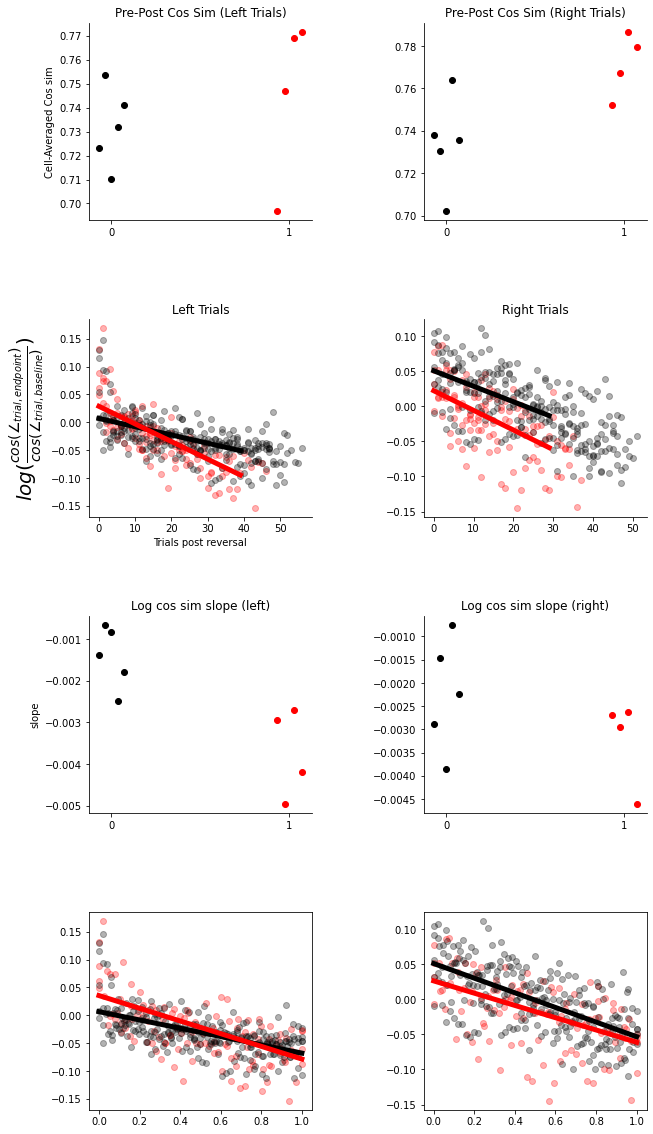

In [70]:
fig,ax = plt.subplots(4,2, figsize=[10,20])
fig.subplots_adjust(wspace=.5, hspace=.5)



## correlation to endpoints
ko_jitter = np.linspace(-.07,.07,num=4) #.05*rng.standard_normal([4,])
ctrl_jitter = np.linspace(-.07,.07,num=5) #.05*rng.standard_normal([5,])

# [res[-1]['endpoints'] for mouse, res in ko_corr_ratio.items()]
l_ko_corr = [res[-1]['endpoints'].mean() for mouse, res in ko_corr_ratio.items() if mouse not in ['4467975.1']]
l_ctrl_corr = [res[-1]['endpoints'].mean() for mouse, res in ctrl_corr_ratio.items()]# if mouse not in ['4467975.1']]
t,p = sp.stats.ttest_ind(l_ko_corr,l_ctrl_corr)
# t,p = sp.stats.ranksums(l_ko_corr,l_ctrl_corr)
print('L endpoints', t, p)
ax[0,0].scatter(np.ones([4,]) + ko_jitter,l_ko_corr,color='red')
ax[0,0].scatter(np.zeros([5,])+ ctrl_jitter,l_ctrl_corr,color='black')
ax[0,0].set_xticks([0,1])
# ax[0,0].set_ylim([.68, .8])
ax[0,0].set_ylabel('Cell-Averaged Cos sim')
ax[0,0].set_title('Pre-Post Cos Sim (Left Trials)')



r_ko_corr = [res[1]['endpoints'].mean() for mouse, res in ko_corr_ratio.items() if mouse not in ['4467975.1']]
r_ctrl_corr = [res[1]['endpoints'].mean() for mouse, res in ctrl_corr_ratio.items()]# if mouse not in ['4467975.1']]
t,p = sp.stats.ttest_ind(r_ko_corr,r_ctrl_corr)
# t,p = sp.stats.ranksums(r_ko_corr,r_ctrl_corr)
print('endpoints', t, p)
ax[0,1].scatter(np.ones([4,]) + ko_jitter, r_ko_corr,color='red')
ax[0,1].scatter(np.zeros([5,]) + ctrl_jitter, r_ctrl_corr,color='black')
ax[0,1].set_xticks([0,1])
# ax[0,1].set_ylim([.68, .8])
ax[0,1].set_title('Pre-Post Cos Sim (Right Trials)')
    
## trial by trial change in correlation

df_l = pd.DataFrame({'mouse':[],
                     'trial': [],
                     'trial_frac': [],
                     'ko': [],
                     'ko_x_trial': [],
                     'ko_x_trial_frac': [],
                     'llr': [],
                     'intercept': [],
                  })
df_r = pd.DataFrame({'mouse':[],
                     'trial': [],
                     'trial_frac': [],
                     'ko': [],
                     'ko_x_trial': [],
                     'ko_x_trial_frac': [],
                     'llr': [],
                     'intercept': [],
                  })

ko_slopes =  np.zeros([4,2])
m = 0
for mouse, res  in ko_corr_ratio.items():
    for i, lr in enumerate([-1,1]):
        arr = res[lr]['trial']
        trials = np.arange(0,arr.shape[0])
        trials_frac = np.linspace(0,1,num=arr.shape[0])
        print(mouse, lr, "trials %d" % trials[-1])
        
        
        for t, (a, tf) in enumerate(zip(arr, trials_frac)):
            if i ==0:
                df_l = df_l.append({'mouse': mouse,
                                    'trial': t,
                                    'trial_frac': tf, 
                                    'ko': 1,
                                    'ko_x_trial': t,
                                    'ko_x_trial_frac': tf, 
                                    'llr': a,
                                    'intercept': 1},ignore_index=True)
            else:
                df_r = df_r.append({'mouse': mouse,
                                    'trial': t,
                                    'trial_frac': tf,
                                    'ko': 1,
                                    'ko_x_trial': t,
                                    'ko_x_trial_frac': tf,
                                    'llr': a,
                                    'intercept': 1},ignore_index=True)
        
#         trials = np.arange(0,arr.shape[0])
#         print(arr)
        if mouse not in ['4467975.1']:
            ax[1,i].scatter(trials, arr, color='red',alpha=.3)
            ax[3,i].scatter(trials_frac, arr, color='red', alpha = .3)
            reg_res = sp.stats.linregress(trials,arr)
#             print(mouse, 'lr',lr,reg_res.slope)
            ko_slopes[m,i] = reg_res.slope
            if i==1:
                m+=1
        
ctrl_slopes =  np.zeros([5,2])
for m, (mouse, res)  in enumerate(ctrl_corr_ratio.items()):
    for i, lr in enumerate([-1,1]):

        arr = res[lr]['trial']
        trials = np.arange(0,arr.shape[0])
        trials_frac = np.linspace(0,1,num=arr.shape[0])
        for t, (a, tf) in enumerate(zip(arr, trials_frac)):
            if i ==0:
                df_l = df_l.append({'mouse': mouse,
                                    'trial': t,
                                    'trial_frac': tf,
                                    'ko': 0,
                                    'ko_x_trial': 0,
                                    'ko_x_trial_frac': 0,
                                    'llr': a,
                                    'intercept': 1},ignore_index=True)
            else:
                df_r = df_r.append({'mouse': mouse,
                                    'trial': t,
                                    'trial_frac': tf,
                                    'ko': 0,
                                    'ko_x_trial': 0,
                                    'ko_x_trial_frac': 0,
                                    'llr': a,
                                    'intercept': 1},ignore_index=True)
#         trials = np.arange(0,arr.shape[0])
#         if mouse not in ['4467975.1']:
        ax[1,i].scatter(trials, arr, color='black',alpha=.3)
        ax[3,i].scatter(trials_frac, arr, color='black', alpha = .3)
            
        
        reg_res = sp.stats.linregress(trials,arr)
        ctrl_slopes[m,i] = reg_res.slope

ax[1,0].set_ylabel(r'$log(\frac{cos(\angle_{trial, endpoint})}{cos(\angle_{trial, baseline})})$',fontsize=20)
ax[1,0].set_title('Left Trials')
ax[1,1].set_title('Right Trials')
ax[1,0].set_xlabel('Trials post reversal')



## slopes
ax[2,0].scatter(np.ones([4,]) + ko_jitter, ko_slopes[:,0], color='red')
ax[2,0].scatter(np.zeros([5,]) + ctrl_jitter, ctrl_slopes[:,0], color='black')
ax[2,0].set_xticks([0,1])
# ax[2,0].set_ylim([-.015, 0])
ax[2,0].set_ylabel('slope')
ax[2,0].set_title('Log cos sim slope (left)')

print('ko_slopes ', ko_slopes)
ax[2,1].scatter(np.ones([4,]) + ko_jitter, ko_slopes[:,1], color='red')
ax[2,1].scatter(np.zeros([5,]) + ctrl_jitter, ctrl_slopes[:,1], color='black')
ax[2,1].set_xticks([0,1])
# ax[2,1].set_ylim([-.015, 0])
ax[2,1].set_title('Log cos sim slope (right)')

t,p = sp.stats.ttest_ind(ko_slopes[:,0],ctrl_slopes[:,0])
# t,p = sp.stats.ranksums(ko_slopes[:,0],ctrl_slopes[:,0])
print(t,p)

t,p = sp.stats.ttest_ind(ko_slopes[:,1],ctrl_slopes[:,1])
# t,p = sp.stats.ranksums(ko_slopes[:,1],ctrl_slopes[:,1])
print(t,p)
    

    
lmm_res = MixedLM(df_l['llr'], df_l[[ 'trial', 'ko_x_trial', 'ko', 'intercept']], df_l['mouse'])
lmm_resf = lmm_res.fit()
trials = np.arange(0,40) #100)
y = trials*lmm_resf.params['trial'] + lmm_resf.params['intercept']
ax[1,0].plot(trials, y, color = 'black',linewidth=5)
y = trials*(lmm_resf.params['trial'] +lmm_resf.params['ko_x_trial']) + lmm_resf.params['intercept'] + lmm_resf.params['ko']
ax[1,0].plot(trials,y, color='red',linewidth=5)

lmm_res = MixedLM(df_l['llr'], df_l[[ 'trial_frac', 'ko_x_trial_frac', 'ko', 'intercept']], df_l['mouse'])
lmm_resf = lmm_res.fit()
trials = np.linspace(0,1) #100)
y = trials*lmm_resf.params['trial_frac'] + lmm_resf.params['intercept']
ax[3,0].plot(trials, y, color = 'black',linewidth=5)
y = trials*(lmm_resf.params['trial_frac'] +lmm_resf.params['ko_x_trial_frac']) + lmm_resf.params['intercept'] + lmm_resf.params['ko']
ax[3,0].plot(trials,y, color='red',linewidth=5)



lmm_res = MixedLM(df_r['llr'], df_r[[ 'trial', 'ko_x_trial', 'ko', 'intercept']], df_r['mouse'])
lmm_resf = lmm_res.fit()
trials = np.arange(0,30) #100)
y = trials*lmm_resf.params['trial'] + lmm_resf.params['intercept']
ax[1,1].plot(trials, y, color = 'black',linewidth=5)
y = trials*(lmm_resf.params['trial'] +lmm_resf.params['ko_x_trial']) + lmm_resf.params['intercept'] + lmm_resf.params['ko']
ax[1,1].plot(trials,y, color='red',linewidth=5)

lmm_res = MixedLM(df_r['llr'], df_r[[ 'trial_frac', 'ko_x_trial_frac', 'ko', 'intercept']], df_r['mouse'])
lmm_resf = lmm_res.fit()
trials = np.linspace(0,1) #100)
y = trials*lmm_resf.params['trial_frac'] + lmm_resf.params['intercept']
ax[3,1].plot(trials, y, color = 'black',linewidth=5)
y = trials*(lmm_resf.params['trial_frac'] +lmm_resf.params['ko_x_trial_frac']) + lmm_resf.params['intercept'] + lmm_resf.params['ko']
ax[3,1].plot(trials,y, color='red',linewidth=5)


for i in range(3):
    for j in range(2):
        ax[i,j].spines['top'].set_visible(False)
        ax[i,j].spines['right'].set_visible(False)
        
fig.savefig(os.path.join(figdir,"remapping_rate_frac.pdf"),format='pdf')

In [71]:
lmm_res = MixedLM(df_l['llr'], df_l[['trial', 'ko_x_trial', 'ko', 'intercept']], df_l['mouse'], exog_re  = df_l['trial'])
lmm_resf = lmm_res.fit()
print(lmm_resf.summary())
print(lmm_resf.pvalues)

/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)


LinAlgError: Singular matrix

In [72]:
lmm_res = MixedLM(df_l['llr'], df_l[[ 'trial_frac', 'ko_x_trial_frac', 'ko', 'intercept']], df_l['mouse'], exog_re = df_l['trial_frac'])
lmm_resf = lmm_res.fit()
print(lmm_resf.summary())
print(lmm_resf.pvalues)

          Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  llr     
No. Observations:   389      Method:              REML    
No. Groups:         9        Scale:               0.0008  
Min. group size:    20       Log-Likelihood:      806.1885
Max. group size:    57       Converged:           Yes     
Mean group size:    43.2                                  
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
trial_frac      -0.074    0.018 -4.104 0.000 -0.109 -0.039
ko_x_trial_frac -0.028    0.028 -1.011 0.312 -0.082  0.026
ko               0.021    0.006  3.577 0.000  0.010  0.033
intercept        0.006    0.003  1.863 0.062 -0.000  0.013
trial_frac Var   0.001    0.029                           

trial_frac         0.000041
ko_x_trial_frac    0.312071
ko                 0.000347
intercept          0.062463
trial_frac Va

/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [36]:
lmm_res = MixedLM(df_r['llr'], df_r[[ 'trial', 'ko_x_trial', 'ko', 'intercept']], df_r['mouse'], exog_re = df_r['trial'])
lmm_resf = lmm_res.fit()
print(lmm_resf.summary())
print(lmm_resf.pvalues)

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: llr     
No. Observations: 357     Method:             REML    
No. Groups:       9       Scale:              0.0010  
Min. group size:  17      Log-Likelihood:     692.1516
Max. group size:  52      Converged:          Yes     
Mean group size:  39.7                                
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
trial       -0.002    0.000 -4.553 0.000 -0.003 -0.001
ko_x_trial  -0.001    0.001 -0.838 0.402 -0.002  0.001
ko          -0.028    0.007 -4.046 0.000 -0.042 -0.014
intercept    0.050    0.004 12.315 0.000  0.042  0.058
trial Var    0.000    0.000                           

trial         5.282516e-06
ko_x_trial    4.018024e-01
ko            5.204190e-05
intercept     7.492938e-35
trial Var     1.122629e-01
dtype: float64


/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [61]:
lmm_res = MixedLM(df_r['llr'], df_r[[ 'trial_frac', 'ko_x_trial_frac', 'ko', 'intercept']], df_r['mouse'], exog_re = df_r['trial_frac'])
lmm_resf = lmm_res.fit()
print(lmm_resf.summary())
print(lmm_resf.pvalues)

          Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  llr     
No. Observations:   357      Method:              REML    
No. Groups:         9        Scale:               0.0010  
Min. group size:    17       Log-Likelihood:      698.9390
Max. group size:    52       Converged:           Yes     
Mean group size:    39.7                                  
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
trial_frac      -0.102    0.020 -5.140 0.000 -0.142 -0.063
ko_x_trial_frac  0.021    0.031  0.685 0.493 -0.039  0.081
ko              -0.027    0.007 -3.881 0.000 -0.041 -0.013
intercept        0.050    0.004 12.305 0.000  0.042  0.057
trial_frac Var   0.002    0.031                           

trial_frac         2.746635e-07
ko_x_trial_frac    4.932974e-01
ko                 1.042186e-04
intercept          8.537210e-

/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [16]:
ko_corr_ratio = {mouse:corr_ratio_rev(stx.utilities.single_mouse_concat_sessions(mouse,date_inds=[ 6, 7, 8]),metric='cos', cellavg = True, day7test= True ) for mouse in stx.ymaze_sess_deets.KO_sessions.keys() if mouse not in ['4467975.1']}
ctrl_corr_ratio = {mouse:corr_ratio_rev(stx.utilities.single_mouse_concat_sessions(mouse,date_inds=[6, 7, 8]),metric='cos', cellavg= True, day7test = True ) for mouse in stx.ymaze_sess_deets.CTRL_sessions.keys()}

/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_LNovel


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


05_10_2020 YMaze_RewardReversal
06_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/06_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/06_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/06_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/06_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.sbx
  warnings.warn("Could not find sbx file at %s

06_10_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
lr 25.67690445738824 32.67690445738824


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_LNovel


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_006.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_006.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


05_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/06_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_004.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/06_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_004.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


06_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/06_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/06_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


06_10_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
lr 25.67690445738824 32.67690445738824
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
06_10_2020 YMaze_RewardReversal
06_10_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
lr 25.67690445738824 32.67690445738824
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
06_10_2020 YMaze_RewardReversal
06_10_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
lr 25.67690445738824 32.67690445738824
05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
07_12_2020 YMaze_RewardReversal
07_12_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
lr 

L endpoints 0.8509535926426393 0.4229457831600183
endpoints 2.9188975854080845 0.022375119058694378
4467975.2 -1 trials 79
4467975.2 1 trials 67
4467975.3 -1 trials 46
4467975.3 1 trials 46
4467975.4 -1 trials 72
4467975.4 1 trials 67
4467975.5 -1 trials 41
4467975.5 1 trials 36
ko_slopes  [[-0.00259466 -0.00135169]
 [-0.0027408  -0.00266293]
 [-0.00214691 -0.00210813]
 [-0.00304799 -0.00251156]]
-5.0996693126452 0.0014000209770723827
-0.8947713405526444 0.4006279027575991


/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


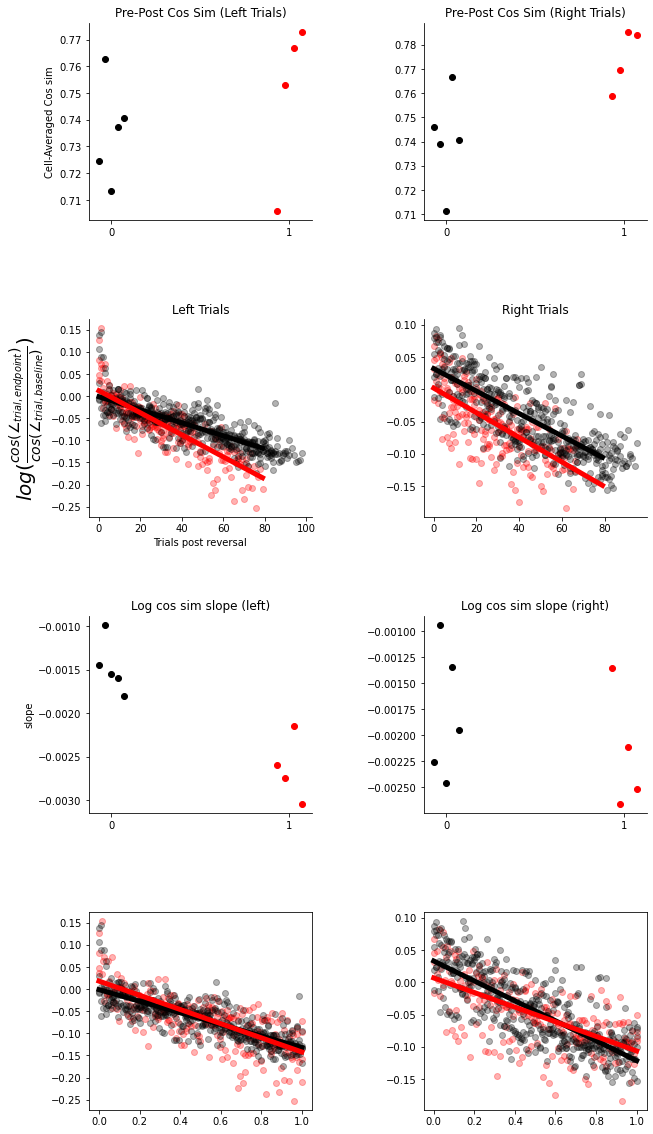

In [19]:
fig,ax = plt.subplots(4,2, figsize=[10,20])
fig.subplots_adjust(wspace=.5, hspace=.5)



## correlation to endpoints
ko_jitter = np.linspace(-.07,.07,num=4) #.05*rng.standard_normal([4,])
ctrl_jitter = np.linspace(-.07,.07,num=5) #.05*rng.standard_normal([5,])

# [res[-1]['endpoints'] for mouse, res in ko_corr_ratio.items()]
l_ko_corr = [res[-1]['endpoints'].mean() for mouse, res in ko_corr_ratio.items() if mouse not in ['4467975.1']]
l_ctrl_corr = [res[-1]['endpoints'].mean() for mouse, res in ctrl_corr_ratio.items()]# if mouse not in ['4467975.1']]
t,p = sp.stats.ttest_ind(l_ko_corr,l_ctrl_corr)
# t,p = sp.stats.ranksums(l_ko_corr,l_ctrl_corr)
print('L endpoints', t, p)
ax[0,0].scatter(np.ones([4,]) + ko_jitter,l_ko_corr,color='red')
ax[0,0].scatter(np.zeros([5,])+ ctrl_jitter,l_ctrl_corr,color='black')
ax[0,0].set_xticks([0,1])
# ax[0,0].set_ylim([.68, .8])
ax[0,0].set_ylabel('Cell-Averaged Cos sim')
ax[0,0].set_title('Pre-Post Cos Sim (Left Trials)')



r_ko_corr = [res[1]['endpoints'].mean() for mouse, res in ko_corr_ratio.items() if mouse not in ['4467975.1']]
r_ctrl_corr = [res[1]['endpoints'].mean() for mouse, res in ctrl_corr_ratio.items()]# if mouse not in ['4467975.1']]
t,p = sp.stats.ttest_ind(r_ko_corr,r_ctrl_corr)
# t,p = sp.stats.ranksums(r_ko_corr,r_ctrl_corr)
print('endpoints', t, p)
ax[0,1].scatter(np.ones([4,]) + ko_jitter, r_ko_corr,color='red')
ax[0,1].scatter(np.zeros([5,]) + ctrl_jitter, r_ctrl_corr,color='black')
ax[0,1].set_xticks([0,1])
# ax[0,1].set_ylim([.68, .8])
ax[0,1].set_title('Pre-Post Cos Sim (Right Trials)')
    
## trial by trial change in correlation

df_l = pd.DataFrame({'mouse':[],
                     'trial': [],
                     'trial_frac': [],
                     'ko': [],
                     'ko_x_trial': [],
                     'ko_x_trial_frac': [],
                     'llr': [],
                     'intercept': [],
                  })
df_r = pd.DataFrame({'mouse':[],
                     'trial': [],
                     'trial_frac': [],
                     'ko': [],
                     'ko_x_trial': [],
                     'ko_x_trial_frac': [],
                     'llr': [],
                     'intercept': [],
                  })

ko_slopes =  np.zeros([4,2])
m = 0
for mouse, res  in ko_corr_ratio.items():
    for i, lr in enumerate([-1,1]):
        arr = res[lr]['trial']
        trials = np.arange(0,arr.shape[0])
        trials_frac = np.linspace(0,1,num=arr.shape[0])
        print(mouse, lr, "trials %d" % trials[-1])
        
        
        for t, (a, tf) in enumerate(zip(arr, trials_frac)):
            if i ==0:
                df_l = df_l.append({'mouse': mouse,
                                    'trial': t,
                                    'trial_frac': tf, 
                                    'ko': 1,
                                    'ko_x_trial': t,
                                    'ko_x_trial_frac': tf, 
                                    'llr': a,
                                    'intercept': 1},ignore_index=True)
            else:
                df_r = df_r.append({'mouse': mouse,
                                    'trial': t,
                                    'trial_frac': tf,
                                    'ko': 1,
                                    'ko_x_trial': t,
                                    'ko_x_trial_frac': tf,
                                    'llr': a,
                                    'intercept': 1},ignore_index=True)
        
#         trials = np.arange(0,arr.shape[0])
#         print(arr)
        if mouse not in ['4467975.1']:
            ax[1,i].scatter(trials, arr, color='red',alpha=.3)
            ax[3,i].scatter(trials_frac, arr, color='red', alpha = .3)
            reg_res = sp.stats.linregress(trials,arr)
#             print(mouse, 'lr',lr,reg_res.slope)
            ko_slopes[m,i] = reg_res.slope
            if i==1:
                m+=1
        
ctrl_slopes =  np.zeros([5,2])
for m, (mouse, res)  in enumerate(ctrl_corr_ratio.items()):
    for i, lr in enumerate([-1,1]):

        arr = res[lr]['trial']
        trials = np.arange(0,arr.shape[0])
        trials_frac = np.linspace(0,1,num=arr.shape[0])
        for t, (a, tf) in enumerate(zip(arr, trials_frac)):
            if i ==0:
                df_l = df_l.append({'mouse': mouse,
                                    'trial': t,
                                    'trial_frac': tf,
                                    'ko': 0,
                                    'ko_x_trial': 0,
                                    'ko_x_trial_frac': 0,
                                    'llr': a,
                                    'intercept': 1},ignore_index=True)
            else:
                df_r = df_r.append({'mouse': mouse,
                                    'trial': t,
                                    'trial_frac': tf,
                                    'ko': 0,
                                    'ko_x_trial': 0,
                                    'ko_x_trial_frac': 0,
                                    'llr': a,
                                    'intercept': 1},ignore_index=True)
#         trials = np.arange(0,arr.shape[0])
#         if mouse not in ['4467975.1']:
        ax[1,i].scatter(trials, arr, color='black',alpha=.3)
        ax[3,i].scatter(trials_frac, arr, color='black', alpha = .3)
            
        
        reg_res = sp.stats.linregress(trials,arr)
        ctrl_slopes[m,i] = reg_res.slope

ax[1,0].set_ylabel(r'$log(\frac{cos(\angle_{trial, endpoint})}{cos(\angle_{trial, baseline})})$',fontsize=20)
ax[1,0].set_title('Left Trials')
ax[1,1].set_title('Right Trials')
ax[1,0].set_xlabel('Trials post reversal')



## slopes
ax[2,0].scatter(np.ones([4,]) + ko_jitter, ko_slopes[:,0], color='red')
ax[2,0].scatter(np.zeros([5,]) + ctrl_jitter, ctrl_slopes[:,0], color='black')
ax[2,0].set_xticks([0,1])
# ax[2,0].set_ylim([-.015, 0])
ax[2,0].set_ylabel('slope')
ax[2,0].set_title('Log cos sim slope (left)')

print('ko_slopes ', ko_slopes)
ax[2,1].scatter(np.ones([4,]) + ko_jitter, ko_slopes[:,1], color='red')
ax[2,1].scatter(np.zeros([5,]) + ctrl_jitter, ctrl_slopes[:,1], color='black')
ax[2,1].set_xticks([0,1])
# ax[2,1].set_ylim([-.015, 0])
ax[2,1].set_title('Log cos sim slope (right)')

t,p = sp.stats.ttest_ind(ko_slopes[:,0],ctrl_slopes[:,0])
# t,p = sp.stats.ranksums(ko_slopes[:,0],ctrl_slopes[:,0])
print(t,p)

t,p = sp.stats.ttest_ind(ko_slopes[:,1],ctrl_slopes[:,1])
# t,p = sp.stats.ranksums(ko_slopes[:,1],ctrl_slopes[:,1])
print(t,p)
    

    
lmm_res = MixedLM(df_l['llr'], df_l[[ 'trial', 'ko_x_trial', 'ko', 'intercept']], df_l['mouse'])
lmm_resf = lmm_res.fit()
trials = np.arange(0,80) #100)
y = trials*lmm_resf.params['trial'] + lmm_resf.params['intercept']
ax[1,0].plot(trials, y, color = 'black',linewidth=5)
y = trials*(lmm_resf.params['trial'] +lmm_resf.params['ko_x_trial']) + lmm_resf.params['intercept'] + lmm_resf.params['ko']
ax[1,0].plot(trials,y, color='red',linewidth=5)

lmm_res = MixedLM(df_l['llr'], df_l[[ 'trial_frac', 'ko_x_trial_frac', 'ko', 'intercept']], df_l['mouse'])
lmm_resf = lmm_res.fit()
trials = np.linspace(0,1) #100)
y = trials*lmm_resf.params['trial_frac'] + lmm_resf.params['intercept']
ax[3,0].plot(trials, y, color = 'black',linewidth=5)
y = trials*(lmm_resf.params['trial_frac'] +lmm_resf.params['ko_x_trial_frac']) + lmm_resf.params['intercept'] + lmm_resf.params['ko']
ax[3,0].plot(trials,y, color='red',linewidth=5)



lmm_res = MixedLM(df_r['llr'], df_r[[ 'trial', 'ko_x_trial', 'ko', 'intercept']], df_r['mouse'])
lmm_resf = lmm_res.fit()
trials = np.arange(0,80) #100)
y = trials*lmm_resf.params['trial'] + lmm_resf.params['intercept']
ax[1,1].plot(trials, y, color = 'black',linewidth=5)
y = trials*(lmm_resf.params['trial'] +lmm_resf.params['ko_x_trial']) + lmm_resf.params['intercept'] + lmm_resf.params['ko']
ax[1,1].plot(trials,y, color='red',linewidth=5)

lmm_res = MixedLM(df_r['llr'], df_r[[ 'trial_frac', 'ko_x_trial_frac', 'ko', 'intercept']], df_r['mouse'])
lmm_resf = lmm_res.fit()
trials = np.linspace(0,1) #100)
y = trials*lmm_resf.params['trial_frac'] + lmm_resf.params['intercept']
ax[3,1].plot(trials, y, color = 'black',linewidth=5)
y = trials*(lmm_resf.params['trial_frac'] +lmm_resf.params['ko_x_trial_frac']) + lmm_resf.params['intercept'] + lmm_resf.params['ko']
ax[3,1].plot(trials,y, color='red',linewidth=5)


for i in range(3):
    for j in range(2):
        ax[i,j].spines['top'].set_visible(False)
        ax[i,j].spines['right'].set_visible(False)
        
fig.savefig(os.path.join(figdir,"remapping_rate_day7test.pdf"),format='pdf')

In [20]:
lmm_res = MixedLM(df_l['llr'], df_l[[ 'trial', 'ko_x_trial', 'ko', 'intercept']], df_l['mouse'], exog_re = df_l['trial'])
lmm_resf = lmm_res.fit()
print(lmm_resf.summary())
print(lmm_resf.pvalues)

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: llr      
No. Observations: 690     Method:             REML     
No. Groups:       9       Scale:              0.0008   
Min. group size:  42      Log-Likelihood:     1458.6343
Max. group size:  99      Converged:          Yes      
Mean group size:  76.7                                 
-------------------------------------------------------
            Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------
trial       -0.001    0.000 -11.467 0.000 -0.002 -0.001
ko_x_trial  -0.001    0.000  -4.614 0.000 -0.001 -0.001
ko           0.013    0.004   2.949 0.003  0.004  0.021
intercept   -0.001    0.003  -0.536 0.592 -0.006  0.004
trial Var    0.000    0.000                            

trial         1.932480e-30
ko_x_trial    3.956829e-06
ko            3.191507e-03
intercept     5.918478e-01
trial Var     8.905472e-02
dtype: float64


/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [21]:
lmm_res = MixedLM(df_l['llr'], df_l[[ 'trial_frac', 'ko_x_trial_frac', 'ko', 'intercept']], df_l['mouse'], exog_re=df_l['trial_frac'])
lmm_resf = lmm_res.fit()
print(lmm_resf.summary())
print(lmm_resf.pvalues)

          Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  llr      
No. Observations:  690      Method:              REML     
No. Groups:        9        Scale:               0.0008   
Min. group size:   42       Log-Likelihood:      1461.9251
Max. group size:   99       Converged:           Yes      
Mean group size:   76.7                                   
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
trial_frac      -0.131    0.020 -6.684 0.000 -0.169 -0.092
ko_x_trial_frac -0.017    0.029 -0.577 0.564 -0.075  0.041
ko               0.012    0.004  2.791 0.005  0.004  0.021
intercept       -0.001    0.003 -0.533 0.594 -0.006  0.004
trial_frac Var   0.002    0.036                           

trial_frac         2.317720e-11
ko_x_trial_frac    5.638716e-01
ko                 5.258284e-03
intercept          5.940580e-

/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [ ]:
# second reversal behavior





In [22]:
ctrl_arrays = rev_arrays(ctrl_mice, date_inds = (6,7,8))
ko_arrays = rev_arrays(ko_mice[1:],  date_inds = (6,7,8))

05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
07_12_2020 YMaze_RewardReversal
07_12_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
07_12_2020 YMaze_RewardReversal
07_12_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
07_12_2020 YMaze_RewardReversal
07_12_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
06_12_2020 YMaze_LNovel
06_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
07_12_2020 YMaze_RewardReversal
07_12_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_LNovel


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


05_10_2020 YMaze_RewardReversal
06_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/06_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/06_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/06_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/06_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.sbx
  warnings.warn("Could not find sbx file at %s

06_10_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_LNovel


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_006.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_006.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


05_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/06_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_004.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/06_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_004.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


06_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/06_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/06_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


06_10_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
06_10_2020 YMaze_RewardReversal
06_10_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
06_10_2020 YMaze_RewardReversal
06_10_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']


In [23]:
# second reversal neural data

def reversal_plots_ret(arrays):

    fig_l, ax = plt.subplots(3,3, figsize=[15,15])
    fig_l.subplots_adjust(wspace=.3)

    b_l_sort = np.argsort(np.argmax(arrays['b_l_odd'],axis=0))
    b_l_mu, b_l_std = np.nanmean(arrays['b_l_odd'],axis=0, keepdims=True), np.nanstd(arrays['b_l_odd'], axis=0, keepdims=True)
    b_l_plot = (arrays['b_l_even']-b_l_mu)/b_l_std
    ax[0,0].imshow(b_l_plot[:,b_l_sort].T,cmap='pink',vmin=0,vmax=4, aspect='auto')
    ax[0,0].set_title("N cells %d" % b_l_sort.shape[0])
    

#     rev_b_l_plot = (arrays['rev_l_all']-b_l_mu)/b_l_std
    rev_b_l_plot = sp.stats.zscore(arrays['rev_l_all'],axis=0)
    ax[0,1].imshow(rev_b_l_plot[:,b_l_sort].T, cmap = 'pink', vmin=0, vmax=4, aspect='auto')
    

# #     ret_b_l_plot = (arrays['ret_l_all']-b_l_mu)/b_l_std
    ret_b_l_plot = sp.stats.zscore(arrays['ret_l_all'],axis=0)
    ax[0,2].imshow(ret_b_l_plot[:,b_l_sort].T, cmap = 'pink', vmin=0, vmax=3, aspect='auto')
    


    rev_l_sort = np.argsort(np.argmax(arrays['rev_l_odd'],axis=0))
#     rev_l_mu, rev_l_std = np.nanmean(arrays['rev_l_odd'],axis=0, keepdims=True), np.nanstd(arrays['rev_l_odd'], axis=0, keepdims=True)
#     rev_l_plot = (arrays['rev_l_even']-rev_l_mu)/rev_l_std
    rev_l_plot = sp.stats.zscore(arrays['rev_l_even'], axis = 0)
    ax[1,1].imshow(rev_l_plot[:,rev_l_sort].T,cmap='pink',vmin=0,vmax=4, aspect='auto')
    ax[1,1].set_title("N cells %d" % rev_l_sort.shape[0])

#     b_rev_l_plot = (arrays['b_l_all']-rev_l_mu)/rev_l_std
    b_rev_l_plot = sp.stats.zscore(arrays['b_l_all'],axis=0)
    ax[1,0].imshow(b_rev_l_plot[:,rev_l_sort].T, cmap = 'pink', vmin=0, vmax=4, aspect='auto')

# #     ret_rev_l_plot = (arrays['ret_l_all']-rev_l_mu)/rev_l_std
    ret_rev_l_plot = sp.stats.zscore(arrays['ret_l_all'], axis=0)
    ax[1,2].imshow(ret_rev_l_plot[:,rev_l_sort].T, cmap = 'pink', vmin=0, vmax=3, aspect='auto')


    ret_l_sort = np.argsort(np.argmax(arrays['ret_l_odd'],axis=0))
# #     ret_l_mu, ret_l_std = np.nanmean(arrays['ret_l_odd'],axis=0, keepdims=True), np.nanstd(arrays['ret_l_odd'], axis=0, keepdims=True)
# #     ret_l_plot = (arrays['ret_l_even']-ret_l_mu)/ret_l_std
    ret_l_plot = sp.stats.zscore(arrays['ret_l_even'], axis = 0)
    ax[2,2].imshow(ret_l_plot[:,ret_l_sort].T,cmap='pink',vmin=0,vmax=3, aspect='auto')
    ax[2,2].set_title("N cells %d" % ret_l_sort.shape[0])

# #     b_ret_l_plot = (arrays['b_l_all']-ret_l_mu)/ret_l_std
    b_ret_l_plot = sp.stats.zscore(arrays['b_l_all'], axis=0)
    ax[2,0].imshow(b_ret_l_plot[:,ret_l_sort].T, cmap = 'pink', vmin=0, vmax=3, aspect='auto')

# #     rev_ret_l_plot = (arrays['rev_l_all']-ret_l_mu)/ret_l_std
    rev_ret_l_plot = sp.stats.zscore(arrays['rev_l_all'],axis=0)
    ax[2,1].imshow(rev_ret_l_plot[:,ret_l_sort].T, cmap = 'pink', vmin=0, vmax=3, aspect='auto')

    for r in range(3):
        for c in range(3):
            ax[r,c,].plot([-.5,29.5], [0,b_l_plot.shape[1]-1], color='blue', linewidth=3)

    ######
    fig_r, ax = plt.subplots(3,3, figsize=[15,15])
    fig_r.subplots_adjust(wspace=.3)

    b_r_sort = np.argsort(np.argmax(arrays['b_r_odd'],axis=0))
#     b_r_mu, b_r_std = np.nanmean(arrays['b_r_odd'],axis=0, keepdims=True), np.nanstd(arrays['b_r_odd'], axis=0, keepdims=True)
#     b_r_plot = (arrays['b_r_even']-b_r_mu)/b_r_std
    b_r_plot = sp.stats.zscore(arrays['b_r_even'], axis=0)
    ax[0,0].imshow(b_r_plot[:,b_r_sort].T,cmap='pink',vmin=0,vmax=4, aspect='auto')
    ax[0,0].set_title("N cells %d" % b_r_sort.shape[0])

#     rev_b_r_plot = (arrays['rev_r_all']-b_r_mu)/b_r_std
    rev_b_r_plot = sp.stats.zscore(arrays['rev_r_all'], axis =0)
    ax[0,1].imshow(rev_b_r_plot[:,b_r_sort].T, cmap = 'pink', vmin=0, vmax=4, aspect='auto')

# #     ret_b_r_plot = (arrays['ret_r_all']-b_r_mu)/b_r_std
    ret_b_r_plot = sp.stats.zscore(arrays['ret_r_all'], axis = 0)
    ax[0,2].imshow(ret_b_r_plot[:,b_r_sort].T, cmap = 'pink', vmin=0, vmax=3, aspect='auto')


    rev_r_sort = np.argsort(np.argmax(arrays['rev_r_odd'],axis=0))
#     rev_r_mu, rev_r_std = np.nanmean(arrays['rev_r_odd'],axis=0, keepdims=True), np.nanstd(arrays['rev_r_odd'], axis=0, keepdims=True)
#     rev_r_plot = (arrays['rev_r_even']-rev_r_mu)/rev_r_std
    rev_r_plot = sp.stats.zscore(arrays['rev_r_even'], axis=0)
    ax[1,1].imshow(rev_r_plot[:,rev_r_sort].T,cmap='pink',vmin=0,vmax=4, aspect='auto')
    ax[1,1].set_title("N cells %d" % rev_r_sort.shape[0])

#     b_rev_r_plot = (arrays['b_r_all']-rev_r_mu)/rev_r_std
    b_rev_r_plot = sp.stats.zscore(arrays['b_r_all'], axis = 0)
    ax[1,0].imshow(b_rev_l_plot[:,rev_r_sort].T, cmap = 'pink', vmin=0, vmax=4, aspect='auto')

# #     ret_rev_r_plot = (arrays['ret_r_all']-rev_r_mu)/rev_r_std
    ret_rev_r_plot = sp.stats.zscore(arrays['ret_r_all'], axis=0)
    ax[1,2].imshow(ret_rev_r_plot[:,rev_r_sort].T, cmap = 'pink', vmin=0, vmax=3, aspect='auto')


    ret_r_sort = np.argsort(np.argmax(arrays['ret_r_odd'],axis=0))
# #     ret_r_mu, ret_r_std = np.nanmean(arrays['ret_r_odd'],axis=0, keepdims=True), np.nanstd(arrays['ret_r_odd'], axis=0, keepdims=True)
# #     ret_r_plot = (arrays['ret_r_even']-ret_r_mu)/ret_r_std
    ret_r_plot = sp.stats.zscore(arrays['ret_r_even'],axis = 0)
    ax[2,2].imshow(ret_r_plot[:,ret_r_sort].T,cmap='pink',vmin=0,vmax=3, aspect='auto')
    ax[2,2].set_title("N cells %d" % ret_r_sort.shape[0])

# #     b_ret_r_plot = (arrays['b_r_all']-ret_r_mu)/ret_r_std
    b_ret_r_plot = sp.stats.zscore(arrays['b_r_all'], axis=0)
    ax[2,0].imshow(b_ret_r_plot[:,ret_r_sort].T, cmap = 'pink', vmin=0, vmax=3, aspect='auto')

# #     rev_ret_r_plot = (arrays['rev_r_all']-ret_r_mu)/ret_r_std
    rev_ret_r_plot = sp.stats.zscore(arrays['rev_r_all'],axis = 0)
    ax[2,1].imshow(rev_ret_r_plot[:,ret_r_sort].T, cmap = 'pink', vmin=0, vmax=3, aspect='auto')
    
    for r in range(3):
        for c in range(3):
            ax[r,c,].plot([-.5,29.5], [0,b_r_plot.shape[1]-1], color='blue', linewidth=3)
            
    return fig_l, fig_r


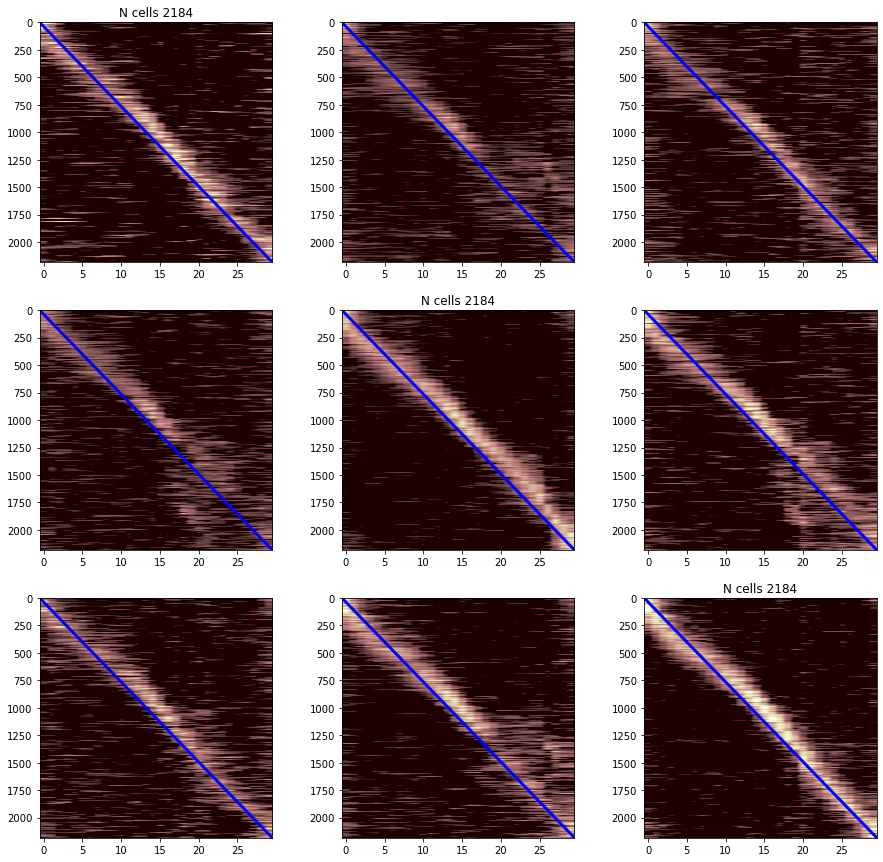

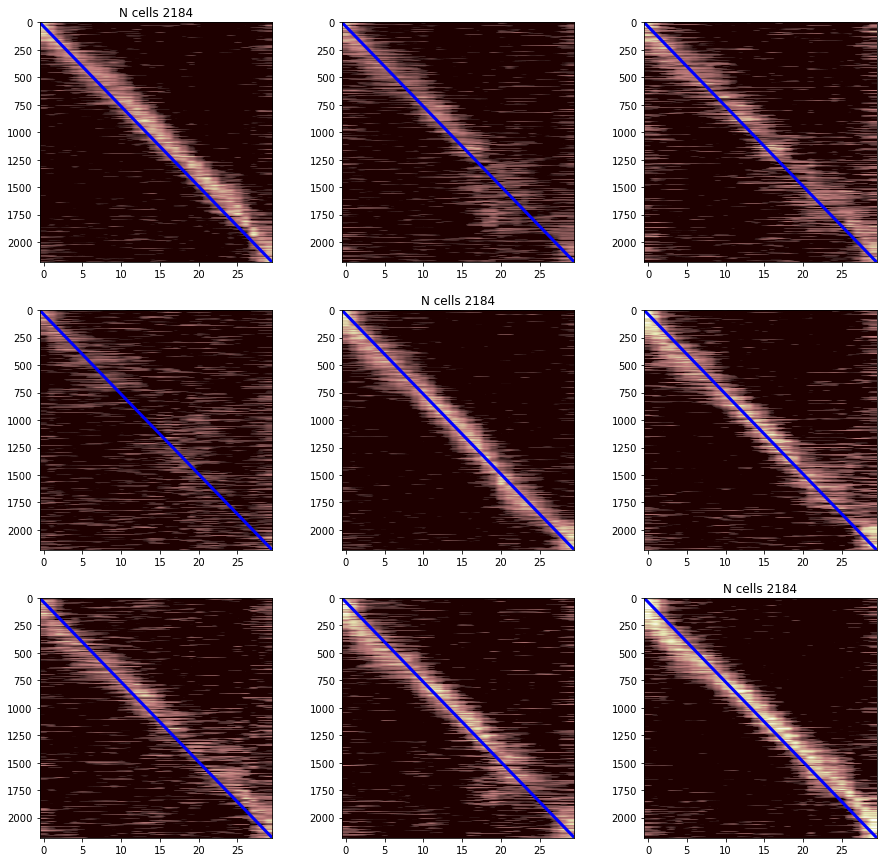

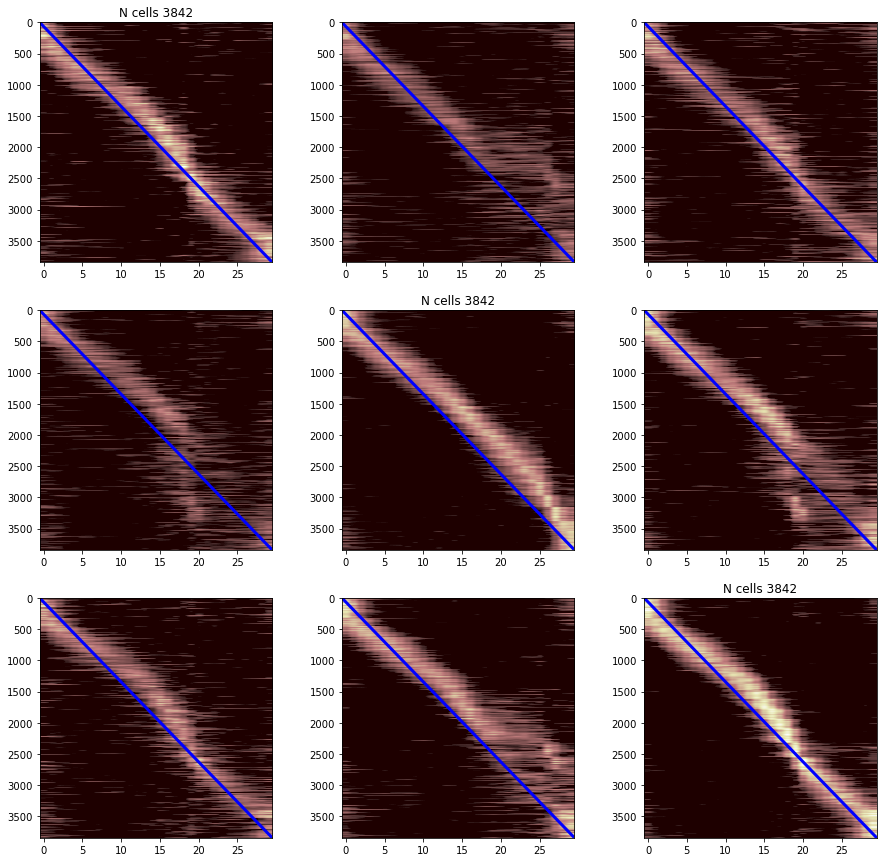

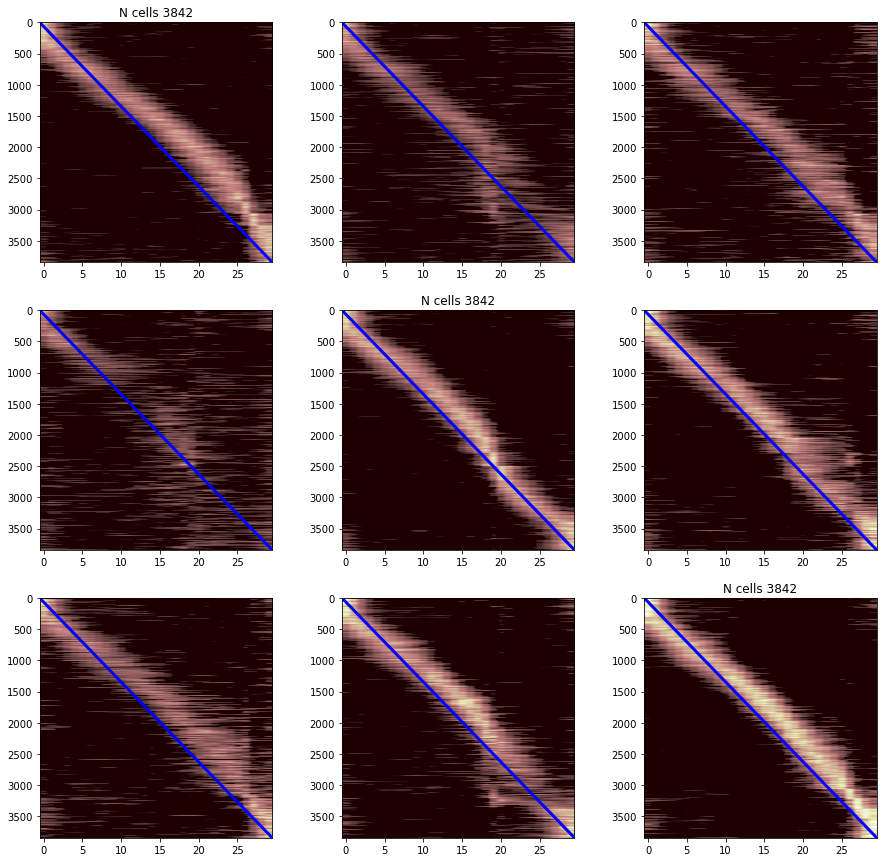

In [24]:
ko_fig_l, ko_fig_r = reversal_plots_ret(ko_arrays)
ko_fig_l.savefig(os.path.join(figdir, "ko_l_reversal_pop_plots_ret.pdf") , format = 'pdf')
ko_fig_r.savefig(os.path.join(figdir, "ko_r_reversal_pop_plots_ret.pdf") , format = 'pdf')

ctrl_fig_l, ctrl_fig_r = reversal_plots_ret(ctrl_arrays)
ctrl_fig_l.savefig(os.path.join(figdir, "ctrl_l_reversal_pop_plots_ret.pdf") , format = 'pdf')
ctrl_fig_r.savefig(os.path.join(figdir, "ctrl_r_reversal_pop_plots_ret.pdf") , format = 'pdf')

In [ ]:
# neural slope vs behavioral slope